In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **DATA LOADING AND READING**

In [2]:
products = pd.read_csv('Products_Data.csv')
print(products.head())

     Brand                Model       Price Number of Ratings Display Size  \
0  Infinix           Zero 40 4G   Rs.70,000                23  6.78 inches   
1  Samsung      Galaxy Z Flip 6  Rs.385,000                39   6.7 inches   
2  Samsung      Galaxy Z Fold 6  Rs.605,000                45   7.6 inches   
3  Samsung           Galaxy A05   Rs.25,000                56   6.7 inches   
4    Tecno  Phantom V Fold 2 5G  Rs.370,000                37  7.85 inches   

    RAM  Battery Internal Memory  
0   8GB   500mAh           256GB  
1  12GB  4000mAh           512GB  
2  12GB  4400mAh           512GB  
3   4GB  5000mAh            64GB  
4  12GB  5750mAh           512GB  


In [3]:
print("Information about Dataset")
print(products.info())

print("Decription of Dataset")
print(products.describe())

print("Tail of Dataset")
print(products.tail())

print("Head of Dataset")
print(products.head())

Information about Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              1345 non-null   object
 1   Model              1345 non-null   object
 2   Price              1345 non-null   object
 3   Number of Ratings  1345 non-null   object
 4   Display Size       1345 non-null   object
 5   RAM                1345 non-null   object
 6   Battery            1345 non-null   object
 7   Internal Memory    1345 non-null   object
dtypes: object(8)
memory usage: 84.2+ KB
None
Decription of Dataset
          Brand             Model      Price Number of Ratings Display Size  \
count      1345              1345       1345              1345         1345   
unique       63               689        457               204          142   
top     Samsung  Galaxy S24 Ultra  Rs.25,000                 2   6.6 inches   
freq        18

In [4]:
print(products.isnull().sum())

Brand                0
Model                0
Price                0
Number of Ratings    0
Display Size         0
RAM                  0
Battery              0
Internal Memory      0
dtype: int64


# **RAM**

In [5]:
# import pandas as pd
# import re
# products = pd.read_csv('Products_Data.csv')
# print(products.head())

print(products['RAM'].unique())

['8GB' '12GB' '4GB' '3GB' '6GB' '2GB' '1GB' '16GB' '8 GBRAM'
 '8 GB + 8 GB EXTENDEDRAM' '4GBRAM' '8GB + 8GB EXTENDED RAMRAM'
 '6GB, 8GB (EXPANDABLE STORAGE UP TO 1TB)RAM'
 '6GB RAM + 12GB DYNAMIC RAMRAM' '4/8 GBRAM' '8GBRAM' '4 GBRAM'
 '4GB + 3GBRAM' '8GB RAMRAM' '8 GB (4+4)RAM' '8 MBRAM' '6 GBRAM'
 '3GB RAM + 3GB EXTENDED RAMRAM' '32MBRAM' '4MBRAM' '3 GBRAM' '2 GBRAM'
 '4GB+8GB EXTENDED RAMRAM' '24GB RAM (12GB+12GB EXTENDED)RAM'
 '6 GB (6GB EXTENDED)RAM' '256 GBRAM' '1 GBRAM'
 '128GB 6GB RAM , 128GB 4GB RAMRAM' '4 + 8 GB , UPTO 12GB DYNAMIC RAMRAM'
 '32 MBRAM' '16MB RAMRAM' '16 MBRAM' '8MBRAM' '8GB,12GBRAM'
 '64/ 128 GBRAM' '2GBRAM' '(6+10)GB RAM , UP TO 16GB DYNAMIC RAMRAM'
 '4/6 GBRAM' '4 GRAM' '2/3 GBRAM' '16GB (8GB + 8GB EXPANDABLE)RAM'
 '12 GBRAM' '128/256 GBRAM' '6/ 8 GBRAM' '3/4 GBRAM'
 '2 GB /4 GB (2GB + 2GB)RAM' '3 / 4 GBRAM'
 '2GB + 4GB , 4 + 4GB EXPANDABLERAM'
 '2 GB (1 GB RAM EXPANSION BY DEFAULT AND UP TO 2 GB RAM EXPANSION)RAM'
 '8 GB (4 GB + 4 GB)RAM' '4GB + 4GB EXTENDE

In [6]:
def cleanRAM(changedRAM):
    original_value = changedRAM

    # Convert to uppercase for uniformity
    changedRAM = str(changedRAM).upper()

    # If no value exists in the column (good practice to handle nulls)
    if not changedRAM or changedRAM in ['NAN', '']:
        print(f"Original Value: {original_value}, No RAM info available.\n")
        return None

    # Remove any extra characters/spaces and standardize format
    changedRAM = changedRAM.replace("RAM", "").replace("GRAM", "GB").replace(" ", "").replace(",", "").strip()

    # Handle cases with '+' (e.g., "4GB+4GB Extended RAM")
    if '+' in changedRAM:
        physicalRAM = re.search(r'(\d+)(GB|MB|TB)', changedRAM)
        if physicalRAM:
            cleaned_value = conversionIntoGB(float(physicalRAM.group(1)), physicalRAM.group(2))
            print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB\n")
            return cleaned_value

    # Handle cases with '/' (e.g., "2/3/4 GB")
    if '/' in changedRAM:
        ramOptions = [float(val.strip()) for val in re.findall(r'\d+', changedRAM)]
        cleaned_value = min(ramOptions)
        print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB\n")
        return cleaned_value

    # General matching for GB, MB, TB (e.g., "12GB", "16MB", "1TB")
    matchRAM = re.search(r'(\d+)\s*(GB|MB|TB)', changedRAM)
    if matchRAM:
        cleaned_value = conversionIntoGB(float(matchRAM.group(1)), matchRAM.group(2))
        print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB\n")
        return cleaned_value

    # Handle simpler formats like just numeric "8GB" or "8 G"
    matchGB = re.search(r'(\d+)(GB)?', changedRAM)
    if matchGB:
        cleaned_value = float(matchGB.group(1))
        print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB\n")
        return cleaned_value

    # If the RAM is marked as "NO", return 0 GB
    if "NO" in changedRAM:
        print(f"Original Value: {original_value}, Final Converted Value: 0 GB (No RAM)\n")
        return 0

    # Handle cases with "[numericValues]RAM" (e.g., "12RAM")
    matchNumericRAM = re.search(r'(\d+)\s*RAM', changedRAM, re.IGNORECASE)
    if matchNumericRAM:
        cleaned_value = float(matchNumericRAM.group(1))
        print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB\n")
        return cleaned_value

    # Handle cases with "TotalMemory(Physical memory + Virtual memory)" (e.g., "8 (4+4) GB")
    matchTotalMemory = re.search(r'(\d+)\s*\(\s*(\d+)\s*\+\s*\d+\s*\)\s*(GB|MB|TB)?', changedRAM)
    if matchTotalMemory:
        cleaned_value = float(matchTotalMemory.group(2))  # Extract the physical memory value (first inside the parentheses)
        print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB (physical memory)\n")
        return cleaned_value

    # Handle cases with just a numeric value (e.g., "8")
    if changedRAM.isdigit():
        cleaned_value = float(changedRAM)
        print(f"Original Value: {original_value}, Final Converted Value: {cleaned_value} GB\n")
        return cleaned_value

    # If nothing matches, return None
    print(f"Original Value: {original_value}, No Conversion Applied.\n")
    return None


def conversionIntoGB(value, unit):
    # Convert MB or TB into GB
    if unit == 'MB':
        converted_value = value / 1024  # MB to GB
        return round(converted_value, 5)
    elif unit == 'TB':
        converted_value = value * 1024  # TB to GB
        return converted_value
    else:
        return value

# Applying the cleaning function to your DataFrame
# products['cleaned_GBRAM'] = products['RAM'].apply(cleanRAM)
products['RAM'] = products['RAM'].apply(cleanRAM)

# Print the original and cleaned RAM values for comparison
# print(products[['RAM','cleaned_GBRAM']])
print(products[['RAM']])


# Filter rows where 'RAM' is null
missingRAMRows = products[products['RAM'].isnull()]
print(missingRAMRows)

# Sum of missing values
missingRAMSUM = products['RAM'].isnull().sum()
print("Missing Values in 'RAM' Column: ", missingRAMSUM)

Original Value: 8GB, Final Converted Value: 8.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 4GB, Final Converted Value: 4.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 8GB, Final Converted Value: 8.0 GB

Original Value: 8GB, Final Converted Value: 8.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 8GB, Final Converted Value: 8.0 GB

Original Value: 4GB, Final Converted Value: 4.0 GB

Original Value: 12GB, Final Converted Value: 12.0 GB

Original Value: 8GB, Final Converted Val

# **BATTERY**

In [7]:
# import pandas as pd
# import re
# products = pd.read_csv('Products_Data.csv')
# print(products.head())

print(products['Battery'].unique())

['500mAh' '4000mAh' '4400mAh' '5000mAh' '5750mAh' '4720mAh' '5050mAh'
 '5100mAh' '4600mAh' '30mAh' '5200mAh' '6000mAh' '5800mAh' '4500mAh'
 '5500mAh' '3000mAh' '5160mAh' '5150mAh' '7000mAh' '1000mAh' '3700mAh'
 '3200mAh' '4230mAh' '2400mAh' '3900mAh' '1450mAh' '4300mAh' '4820mAh'
 '4200mAh' '3110mAh' '4422mAh' '2815mAh' '4383mAh' '3274mAh' '3279mAh'
 '4676mAh' '3349mAh' '4323mAh' '4352mAh' '3095mAh' '5000 mAhBattery'
 '4500 mAhBattery' '1200 mAhBattery' '1500 mAhBattery' '10205 mAhBattery'
 '4000 mAhBattery' '6000 mAhBattery' '2000 mAhBattery' '3800 mAhBattery'
 '2500 mAhBattery' '1150 mAhBattery' '5030 mAhBattery' '5050 mAhBattery'
 '5500 mAhBattery' '7200 mAhBattery' '3200 mAhBattery' '2400 mAhBattery'
 '3000 mAhBattery' '5200 mAhBattery' '4422 mAhBattery' '2815 mAhBattery'
 '1000 mAhBattery' '1450 mAhBattery' '3700 mAhBattery' '3110 mAhBattery'
 '7000 mAhBattery' '2950 mAhBattery' '5800 mAhBattery' '500018 mAhBattery'
 '4383 mAhBattery' 'WhBattery' '4400 mAhBattery' '3274 mAhBattery

In [8]:
def cleanBatteryValue(changedBattery):
    numericPart = re.findall(r'\d+', changedBattery)

    if numericPart:
        return int(numericPart[0])
    else:
        return float('nan')

# products['cleanedBattery'] = products['Battery'].apply(cleanBatteryValue)
products['Battery'] = products['Battery'].apply(cleanBatteryValue)


# CSV
# products['cleanedBattery'].to_csv('cleaned_Battery.csv', index=False)

# print(products[['Battery','cleanedBattery']])
print(products[['Battery']])

# Filter rows where 'Battery' is null
missingBatteryRows = products[products['Battery'].isnull()]
print(missingBatteryRows)

# Sum of missing values
missingBatterySUM = products['Battery'].isnull().sum()
print("Missing Values in 'Battery' Column: ", missingBatterySUM)

      Battery
0       500.0
1      4000.0
2      4400.0
3      5000.0
4      5750.0
...       ...
1340   3000.0
1341   3000.0
1342   3000.0
1343   5000.0
1344   4000.0

[1345 rows x 1 columns]
        Brand             Model       Price Number of Ratings  \
1146    sparx  Sparx Neo 6 Plus  Rs  17,349                43   
1318  qmobile       QMobile i4i   Rs  7,999         2 Ratings   

            Display Size  RAM  Battery Internal Memory  
1146  6.52 InchesDisplay  2.0      NaN            64GB  
1318     5 inchesDisplay  1.0      NaN            8 GB  
Missing Values in 'Battery' Column:  2



# **DISPLAY**

In [9]:
# import pandas as pd
# import re
# products = pd.read_csv('Products_Data.csv')
# print(products.head())

print(products['Display Size'].unique())

['6.78 inches' '6.7 inches' '7.6 inches' '7.85 inches' '6.9 inches'
 '6.5 inches' '6.67 inches' '6.77 inches' '6.2 inches' '6.74 inches'
 '6.8 inches' '6.36 inches' '6.4 inches' '6.6 inches' '6.79 inches'
 '6.71 inches' '6.56 inches' '6.745 inches' '6.72 inches' '2.8 inches'
 '3.5 inches' '6.3 inches' '6.75 inches' '6.517 inches' '2.4 inches'
 '6.43 inches' '6.73 inches' '6.52 inches' '6.68 inches' '6.88 inches'
 '6.51 inches' '5.5 inches' '6.44 inches' '6.64 inches' '2.52 inches'
 '6.82 inches' '6.52  inches' '0 inches' '6.45 inches' '6.55 inches'
 '6.41 inches' '6.1 inches' '5 inches' '5.45 inches' '6.58 inches'
 '6.53 inches' '6.088 inches' '6.62 inches' '6.28 inches' '5.4 inches'
 '6.78 inchesDisplay' '6.78 InchesDisplay' '6.52Display'
 '6.67 InchesDisplay' '6.74 InchesDisplay' '6.6 InchesDisplay'
 '6.7 InchesDisplay' '6.52 inchesDisplay' '6.72 inchesDisplay'
 '6.745 inchesDisplay' '6.71 InchesDisplay' '6.6Display'
 '2.4 inchesDisplay' '6.62 InchesDisplay' '6.4 inchesDisplay'
 '6.5

In [10]:
def cleanDisplaySize(changed_Display):
    match = re.search(r'[\d.]+', changed_Display)
    if match:
        return float(match.group())
    return None

# products['cleaned_Display'] = products['Display Size'].apply(cleanDisplaySize)
# products['cleaned_Display'] = products['Display Size'].apply(cleanDisplaySize)
products['Display Size'] = products['Display Size'].apply(cleanDisplaySize)

# CSV
# products['cleaned_Display'].to_csv('cleaned_Display.csv', index=False)

# print(products[['Display Size','cleaned_Display']])
print(products[['Display Size']])

# Filter rows where 'Display Size' is null
missingDisplayRows = products[products['Display Size'].isnull()]
print(missingDisplayRows)

# Sum of missing values
missingDisplaySUM = products['Display Size'].isnull().sum()
print("Missing Values in 'Display Size' Column: ", missingDisplaySUM)

      Display Size
0             6.78
1             6.70
2             7.60
3             6.70
4             7.85
...            ...
1340          2.40
1341          1.80
1342          2.80
1343          6.67
1344          2.80

[1345 rows x 1 columns]
Empty DataFrame
Columns: [Brand, Model, Price, Number of Ratings, Display Size, RAM, Battery, Internal Memory]
Index: []
Missing Values in 'Display Size' Column:  0


# **INTERNAL MEMORY**

In [11]:
# import pandas as pd
# products = pd.read_csv('Products_Data.csv')
# print(products.head())


print(products['Internal Memory'].unique())

['256GB' '512GB' '64GB' '128GB' '32GB' '16GB' '8GB' '258GB' '126GB'
 '256 GB' '128GB, 256GB' '128/256 GB' '128 GB' '64 GB' '16 MB'
 '64GB / 128gb' '64GB ROM + Expandable up to 256GB' '32Mb' '4MB' '16 GB'
 '256/512 GB' '16GB(8GB Extendable RAM)' '8 GB' '32 MB' '16MB' '8 MB'
 '256 GB/128 GB' '64/128 GB' '8MB' '256GB, 512GB' '4/ 8 GB' '32 GB'
 '32/64 GB' '128' '128/ 256 GB' '64GB , 128gb' '128gb' '32 GB /128 GB'
 '256/ 512 GB/ 1 TB' '64/128/256 GB' '2 GB' '4 MB' '64 GB / 128 GB'
 '128  MB' '512 GB , 256 GB' '512 GB' '64 GB / 128Gb' '8gb' '256gb'
 '12 GB' '4 GB' '4GB + 4GB Extended Ram' '128/ 256/ 512 GB' '16GB Rom'
 '256/ 512 GB/ 1TB' '32/64/128 GB' '128 MB' '64/128 GB RAM' '128GB/256GB'
 '128/256/512 GB' '256GB 8GB RAM' '128/256/512/1TB' '64/ 128 GB' '16gb'
 '4MB Built-in' '48MB' '64/128GB' '16/32 GB' '64/128' '1TB']


In [12]:
def standardize_memory(value):
    try:
        # Convert the value to lowercase and remove extra spaces
        value = value.strip().lower()

        # Print the original cleaned value for debugging
        print(f"Original Value: {value}")

        # Handle TB to GB conversion
        if 'tb' in value:
            tb_values = [float(v) * 1024 for v in re.findall(r'(\d+\.?\d*)tb', value)]
            if tb_values:
                print(f"Cleaned Value: {max(tb_values)} GB (from TB) \n")
                return max(tb_values)

        # Handle MB to GB conversion
        if 'mb' in value:
            mb_values = [float(v) / 1024 for v in re.findall(r'(\d+\.?\d*)mb', value)]
            if mb_values:
                print(f"Cleaned Value: {max(mb_values)} GB (from MB) \n")
                return max(mb_values)

        # Clean and remove unwanted characters like 'rom', 'built-in', etc.
        cleaned_value = value.replace("gb", "").replace(" ", "").replace(",", "").replace("rom", "").replace("extendableupto", "").replace("built-in", "").replace("+", "").replace("(", "").replace(")", "")

        # Print cleaned value before processing `/` and `,` cases
        print(f"Intermediate Cleaned Value: {cleaned_value} \n")

        # Handle cases like '4GB + 4GB Extended RAM' by taking the first valid number
        if '+' in value:
            # Extract all GB values and pick the first valid one
            gb_values = re.findall(r'(\d+\.?\d*)\s*gb', value)
            if gb_values:
                print(f"Cleaned Value: {float(gb_values[0])} GB (first value from '+') \n")
                return float(gb_values[0])

        # Handle cases like "256GB 8GB RAM" by returning the largest value
        gb_values = re.findall(r'(\d+\.?\d*)\s*gb', value)
        if gb_values:
            max_gb_value = max(float(gb) for gb in gb_values)
            print(f"Cleaned Value: {max_gb_value} GB (from multiple GB values) \n")
            return max_gb_value

        # Handle cases like "internal memory 64gb rom + expandable up to 256gb"
        # Process ROM separately and prioritize the ROM value
        rom_values = re.findall(r'(\d+\.?\d*)\s*gb\s*rom', value)
        if rom_values:
            rom_value = float(rom_values[0])
            print(f"Cleaned Value: {rom_value} GB (from ROM) \n")
            return rom_value

        # Handle fallback for cases where no 'GB' unit is found, using numeric values alone
        numeric_matches = re.findall(r'(\d+\.?\d*)', value)
        if numeric_matches:
            max_numeric = max(float(v) for v in numeric_matches)
            print(f"Cleaned Value: {max_numeric} GB (numeric fallback) \n")
            return max_numeric

    except Exception as e:
        print(f"Error processing value '{value}': {e}")

    return None  # Return None for unconvertible values


# Apply the function to the DataFrame column
# products['Internal Memory (GB)'] = products['Internal Memory'].apply(standardize_memory)
products['Internal Memory'] = products['Internal Memory'].apply(standardize_memory)

# Display the updated DataFrame
# print(products[['Internal Memory', 'Internal Memory (GB)']])
print(products[['Internal Memory']])


# Filter rows where 'Internal Memory' is null
missingInternalRows = products[products['Internal Memory'].isnull()]
print(missingInternalRows)

# Sum of missing values
missingInternalSUM = products['Internal Memory'].isnull().sum()
print("Missing Values in 'Internal Memory' Column: ", missingInternalSUM)

Streaming output truncated to the last 5000 lines.
Intermediate Cleaned Value: 512 

Cleaned Value: 512.0 GB (from multiple GB values) 

Original Value: 256gb
Intermediate Cleaned Value: 256 

Cleaned Value: 256.0 GB (from multiple GB values) 

Original Value: 256gb
Intermediate Cleaned Value: 256 

Cleaned Value: 256.0 GB (from multiple GB values) 

Original Value: 128gb
Intermediate Cleaned Value: 128 

Cleaned Value: 128.0 GB (from multiple GB values) 

Original Value: 64gb
Intermediate Cleaned Value: 64 

Cleaned Value: 64.0 GB (from multiple GB values) 

Original Value: 512gb
Intermediate Cleaned Value: 512 

Cleaned Value: 512.0 GB (from multiple GB values) 

Original Value: 512gb
Intermediate Cleaned Value: 512 

Cleaned Value: 512.0 GB (from multiple GB values) 

Original Value: 256gb
Intermediate Cleaned Value: 256 

Cleaned Value: 256.0 GB (from multiple GB values) 

Original Value: 128gb
Intermediate Cleaned Value: 128 

Cleaned Value: 128.0 GB (from multiple GB values) 

Or

# **Price**

In [13]:
# Clean and standardize the 'Price' column
products["Price"] = (
    products["Price"]
    .astype(str)  # Ensure the 'Price' column is treated as strings
    .str.replace(r"[^\d,]+", "", regex=True)  # Remove any characters except digits and commas
    .str.replace(",", "", regex=False)  # Remove commas correctly
    .replace("Price Not Available", np.nan)  # Replace 'Price Not Available' with NaN
    .replace("", np.nan)  # Replace empty strings with NaN
)

# Convert to float (this will force any invalid strings to NaN)
products["Price"] = pd.to_numeric(products["Price"], errors='coerce')

# Step 3: Fill NaN values with the mean price of the respective brand
products["Price"] = products.groupby("Brand")["Price"].transform(
    lambda x: x.fillna(x.mean())
)

# If there's still a NaN value, handle it separately
if products["Price"].isnull().sum() > 0:
    # Check the row where 'Price' is still NaN
    missing_price_rows = products[products["Price"].isnull()]
    print("\nRows with missing 'Price' after filling with the brand mean:")
    print(missing_price_rows)

    # Manually fill NaN 'Price' with the overall mean or median as a last resort
    overall_mean_price = products["Price"].mean()
    products["Price"] = products["Price"].fillna(overall_mean_price)

# Print the DataFrame to verify the fill operation
print("\nDataFrame after filling missing 'Price' values:")
print(products)

# Filter rows where 'Price' is null
missingPriceRows = products[products['Price'].isnull()]
print(missingPriceRows)

# Check if any rows still have missing 'Price' after all filling attempts
missingPriceSUM = products['Price'].isnull().sum()
print("\nMissing Values in 'Price' Column after all filling attempts: ", missingPriceSUM)



Rows with missing 'Price' after filling with the brand mean:
    Brand Model  Price Number of Ratings  Display Size  RAM  Battery  \
874  OPPO  A17k    NaN                 2          6.56  3.0   5000.0   

     Internal Memory  
874             64.0  

DataFrame after filling missing 'Price' values:
        Brand                Model     Price Number of Ratings  Display Size  \
0     Infinix           Zero 40 4G   70000.0                23          6.78   
1     Samsung      Galaxy Z Flip 6  385000.0                39          6.70   
2     Samsung      Galaxy Z Fold 6  605000.0                45          7.60   
3     Samsung           Galaxy A05   25000.0                56          6.70   
4       Tecno  Phantom V Fold 2 5G  370000.0                37          7.85   
...       ...                  ...       ...               ...           ...   
1340    gfive          GFive Disco    3199.0                59          2.40   
1341    gfive          GFive Spark    2325.0         3 Rat

# **Customer Ratings**

In [14]:
# Clean and standardize the 'Number of Ratings' column
products["Number of Ratings"] = (
    products["Number of Ratings"]
    .astype(str)  # Ensure the column is treated as string
    .str.extract(r'(\d+)')  # Extract only the digits (numbers) from the string
    .astype(int)  # Convert the extracted value to an integer
)


# Print the DataFrame to verify the fill operation
# print("\nDataFrame after filling missing 'Number of Ratings' values:")
# print(productss)

# Print the DataFrame to verify the fill operation
print("\nDataFrame after Standarizing and filling missing 'Number of Ratings' values:")
print(products)

# Filter rows where 'Price' is null
missingRatingsRows = products[products['Number of Ratings'].isnull()]
print(missingRatingsRows)

# Check if any rows still have missing 'Number of Ratings' after all filling attempts
missingRatingsSUM = products['Number of Ratings'].isnull().sum()
print("\nMissing Values in 'Number of Ratings' Column after all filling attempts: ", missingRatingsSUM)


DataFrame after Standarizing and filling missing 'Number of Ratings' values:
        Brand                Model     Price  Number of Ratings  Display Size  \
0     Infinix           Zero 40 4G   70000.0                 23          6.78   
1     Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2     Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3     Samsung           Galaxy A05   25000.0                 56          6.70   
4       Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   
...       ...                  ...       ...                ...           ...   
1340    gfive          GFive Disco    3199.0                 59          2.40   
1341    gfive          GFive Spark    2325.0                  3          1.80   
1342  e-tachi         E-Tachi E888    3749.0                 38          2.80   
1343    sparx        SparX Edge 20    5000.0                 24          6.67   
1344    gfive       GFive 4G St

# **Brand and Model**

In [15]:
products['Brand'] = products['Brand'].str.lower().str.strip()
products['Model'] = products['Model'].str.lower().str.strip()

print(products['Brand'].unique())
print("Brand null values: ",products['Brand'].isnull().sum())

print(products['Model'].unique())
print("Model null values",products['Model'].isnull().sum())


['infinix' 'samsung' 'tecno' 'nokia' 'xiaomi' 'oppo' 'realme' 'honor'
 'motorola' 'poco' 'vgotel' 'itel' 'zte' 'calme' 'sparx' 'vivo' 'villaon'
 'dcode' 'umidigi' 'gfive' 'q' 'digit' 'x' 'oneplus' 'huawei' 'g' 'apple'
 'vgo-tel' 'all-call' 'qmobile' 'jazz-digit' 'faywa' 'vnus' 'e-tachi'
 'xsmart' 'kxd' 'gionee' 'oukitel' 'xmobile' 'me-mobile' 'club-mobile']
Brand null values:  0
['zero 40 4g' 'galaxy z flip 6' 'galaxy z fold 6' 'galaxy a05'
 'phantom v fold 2 5g' 'phantom v flip 2 5g' 'g21' '14t pro' 'reno 11 5g'
 '14t' 'redmi note 13 pro+5g' 'camon 30 premier 5g' 'phantom v fold'
 'galaxy s24' 'note 60' 'galaxy s24 ultra' '90' '14' 'galaxy a15'
 'gt 20 pro' 'a3x 4g' 'galaxy s23 fe' 'galaxy a55 5g' 'moto g84 5g'
 'note 40 pro+' 'galaxy s23 ultra' 'pova 5 pro' 'camon 30' 'redmi 13'
 'redmi a3x' 'redmi note 13 4g' 'galaxy a05s' 'x6a' 'x7b' 'x9b 5g'
 'f6 pro' 'smart 8' '90 lite 5g' 'x8b' 's23' 'reno 12 5g' 'note 40 pro 4g'
 'galaxy a35 5g' 'reno12 f 4g' '12+ 5g' 'nubia neo 2' 'galaxy a13'

# DATA AFTER **STANDARIZATION**

In [16]:
# import pandas as pd
# products = pd.read_csv('Products_Data.csv')

# columns = [products['Internal Memory'], products['cleaned_Display'], products['cleanedBattery'], products['cleaned_RAM']]
# products = products[columns]

# products.to_csv('columns.csv', index=False)

print(products.head())

     Brand                Model     Price  Number of Ratings  Display Size  \
0  infinix           zero 40 4g   70000.0                 23          6.78   
1  samsung      galaxy z flip 6  385000.0                 39          6.70   
2  samsung      galaxy z fold 6  605000.0                 45          7.60   
3  samsung           galaxy a05   25000.0                 56          6.70   
4    tecno  phantom v fold 2 5g  370000.0                 37          7.85   

    RAM  Battery  Internal Memory  
0   8.0    500.0            256.0  
1  12.0   4000.0            512.0  
2  12.0   4400.0            512.0  
3   4.0   5000.0             64.0  
4  12.0   5750.0            512.0  


# **HANDLING MISSING VA:UES**

In [17]:
# Check for missing values
missingValues =  products.isnull().sum()
print("Missing Values:\n", missingValues)


# Drop columns with more than 50% missing values
# threshold = len(products) * 0.5
# products = products.loc[:, products.isnull().sum() < threshold]

# Check for missing values
# missingValues =  products.isnull().sum()
# print("Missing Values:\n", missingValues)

# Check rows with missing values before imputation
missingRows = products[products.isnull().any(axis=1)]
print("Rows with Missing Values:\n", missingRows)

Missing Values:
 Brand                0
Model                0
Price                0
Number of Ratings    0
Display Size         0
RAM                  0
Battery              2
Internal Memory      0
dtype: int64
Rows with Missing Values:
         Brand             Model    Price  Number of Ratings  Display Size  \
1146    sparx  sparx neo 6 plus  17349.0                 43          6.52   
1318  qmobile       qmobile i4i   7999.0                  2          5.00   

      RAM  Battery  Internal Memory  
1146  2.0      NaN             64.0  
1318  1.0      NaN              8.0  


In [18]:
# Calculate the mean whBattery value for each brand (ignoring NaN values)
brandBatteryMean = products.groupby('Brand')['Battery'].mean()

# Fill missing whBattery values with the respective brand's mean
products['Battery'] = products.apply(
    lambda row: brandBatteryMean[row['Brand']] if pd.isnull(row['Battery']) else row['Battery'],
    axis=1
)

# Verify if there are still any missing values
print("Missing values after filling: ")
print(products['Battery'].isnull().sum())

Missing values after filling: 
0


In [19]:
missingValues =  products.isnull().sum()
print("Missing Values:\n", missingValues)

Missing Values:
 Brand                0
Model                0
Price                0
Number of Ratings    0
Display Size         0
RAM                  0
Battery              0
Internal Memory      0
dtype: int64


# **Detect and Remove Duplicates**

In [20]:
# Check for duplicate rows
duplicate_rows = products[products.duplicated()]
print(f"Duplicate rows: {duplicate_rows}")

# Count the number of duplicate rows
num_duplicates = products.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Duplicate rows:         Brand                    Model     Price  Number of Ratings  \
53     xiaomi                 redmi 13   43000.0                 19   
82     xiaomi         redmi note 13 4g   58000.0                  2   
191     honor                      x7b   60000.0                 57   
228     calme     4g edge touch & type    9500.0                123   
240   infinix               zero 40 4g   70000.0                 40   
250   samsung            galaxy a35 5g  120000.0                 45   
264   infinix             smart 8 plus   27000.0                  2   
270     sparx                  note 12   27500.0                  3   
278      itel                     p55+   33000.0                  2   
291   infinix           note 40 pro 4g   80000.0                  4   
297   infinix             smart 8 plus   27000.0                  2   
308      itel                     s23+   45000.0                  2   
360     tecno                 camon 20   45000.0             

In [21]:
# Remove duplicate rows
products = products.drop_duplicates()

print(f"Number of remaining duplicate rows: {products.duplicated().sum()}")

Number of remaining duplicate rows: 0


# **Outliers Detection**

In [22]:
from scipy import stats

# Define columns to check for outliers
columns_to_check = ['RAM', 'Battery', 'Internal Memory', 'Display Size']

# Calculate Z-scores for each column
z_scores = stats.zscore(products[columns_to_check])

# Create a DataFrame to hold the Z-scores for better readability
z_scores_products = pd.DataFrame(z_scores, columns=columns_to_check)

# Identify outliers (absolute Z-score > 3)
outliers_zscore = (abs(z_scores_products) > 3).sum()

# Print the count of outliers for each column based on Z-score
print("Outlier count based on Z-score:")
print(outliers_zscore)


Outlier count based on Z-score:
RAM                 6
Battery             2
Internal Memory     3
Display Size       65
dtype: int64


# **EDA**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Univariant**

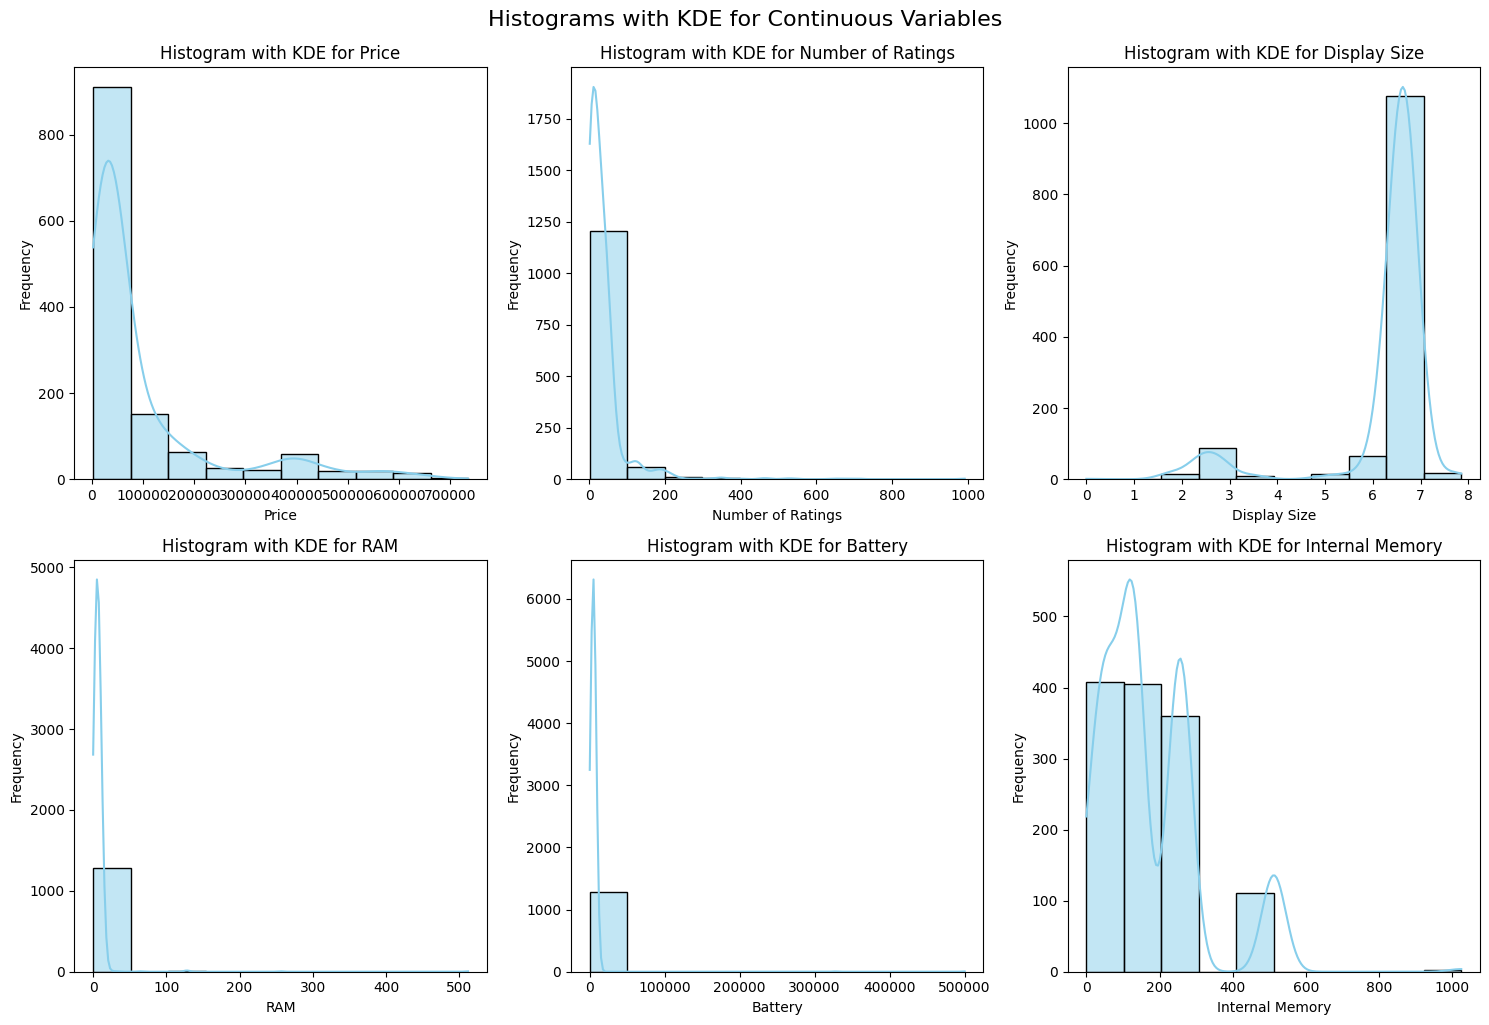

In [24]:
# Automatically identify continuous variables (numeric columns)
continuous_vars = products.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(products[col], kde=True, color='skyblue', bins=10)
    plt.title(f"Histogram with KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Histograms with KDE for Continuous Variables", fontsize=16, y=1.02)
plt.show()

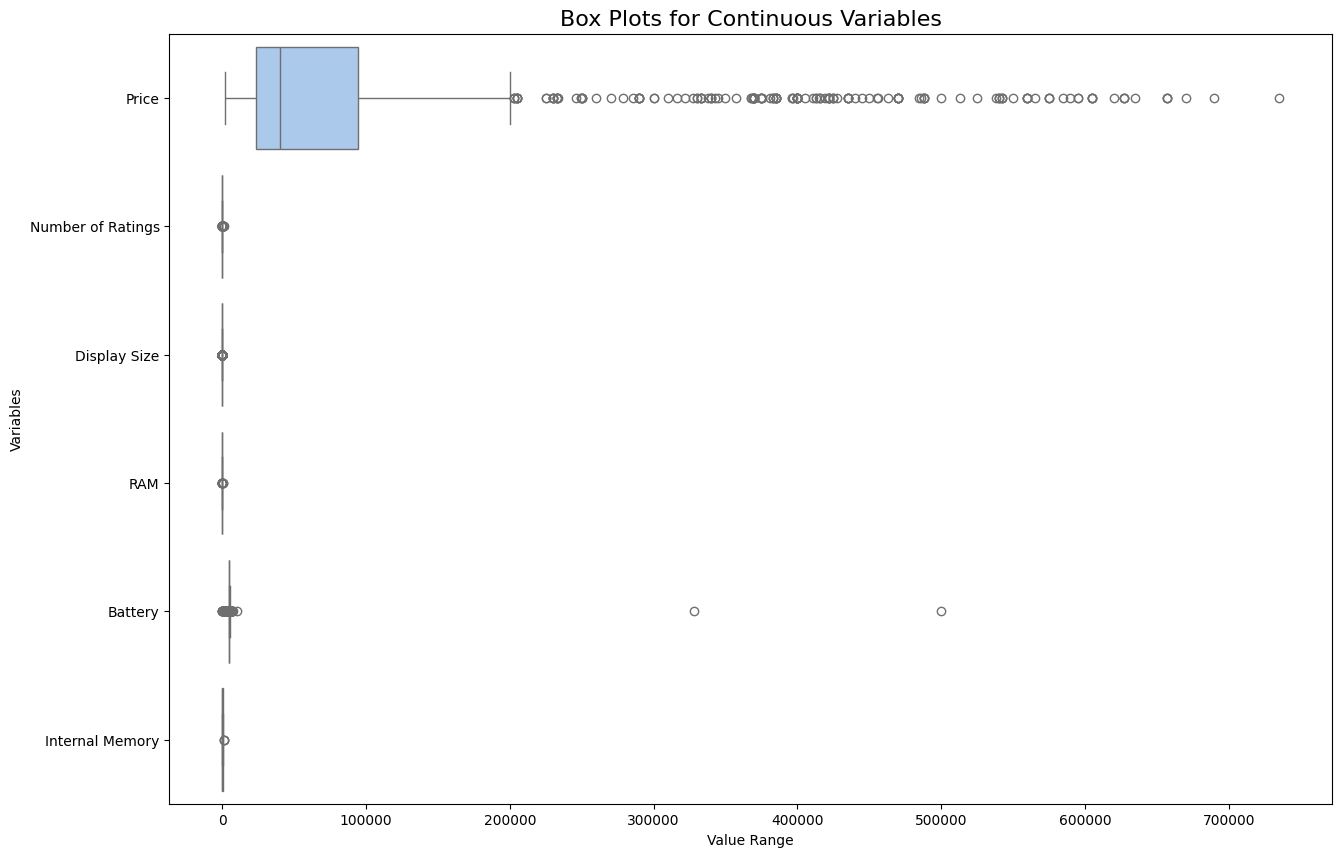

Outlier Detection using IQR:

Price:
  IQR: 71000.0
  Lower Bound: -83251.0
  Upper Bound: 200749.0
  Number of Outliers: 169
  Outliers: [385000.         605000.         370000.         229999.
 385000.         605000.         330000.         290000.
 470000.         340000.         205000.         205000.
 383000.         290000.         542000.         470000.
 470000.         470000.         400000.         435000.
 657000.         385000.         340000.         435000.
 340000.         400000.         657000.         229999.
 290000.         435000.         542000.         542000.
 290000.         435000.         435000.         370000.
 225447.51381215 205000.         383000.         205000.
 229999.         605000.         605000.         385000.
 385000.         385000.         470000.         470000.
 383000.         250000.         425000.         250000.
 540000.         330000.         250000.         560000.
 400000.         333000.         540000.         369000.
 627000

In [25]:
# Automatically identify continuous variables (numeric columns)
continuous_vars = products.select_dtypes(include=['float64', 'int64']).columns

# Plot Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=products[continuous_vars], orient="h", palette="pastel")
plt.title("Box Plots for Continuous Variables", fontsize=16)
plt.xlabel("Value Range")
plt.ylabel("Variables")
plt.show()

# Calculate IQR and detect outliers for each variable
print("Outlier Detection using IQR:\n")
for col in continuous_vars:
    q1 = products[col].quantile(0.25)  # First quartile (25th percentile)
    q3 = products[col].quantile(0.75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Lower whisker
    upper_bound = q3 + 1.5 * iqr  # Upper whisker

    # Identify outliers
    outliers = products[(products[col] < lower_bound) | (products[col] > upper_bound)][col]
    print(f"{col}:\n  IQR: {iqr}\n  Lower Bound: {lower_bound}\n  Upper Bound: {upper_bound}")
    print(f"  Number of Outliers: {len(outliers)}")
    if not outliers.empty:
        print(f"  Outliers: {outliers.values}")
    print("-" * 40)


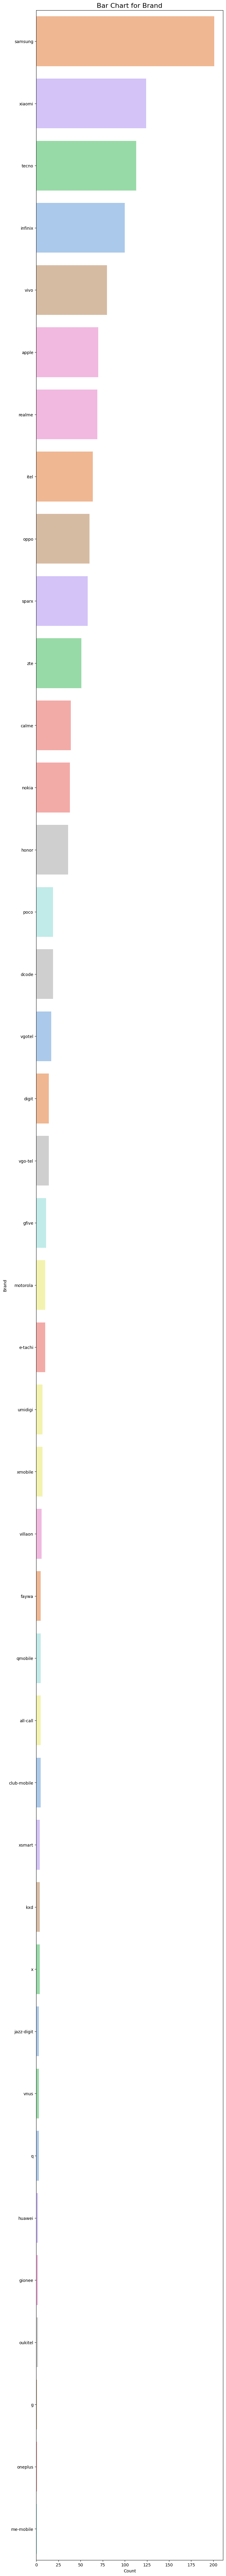

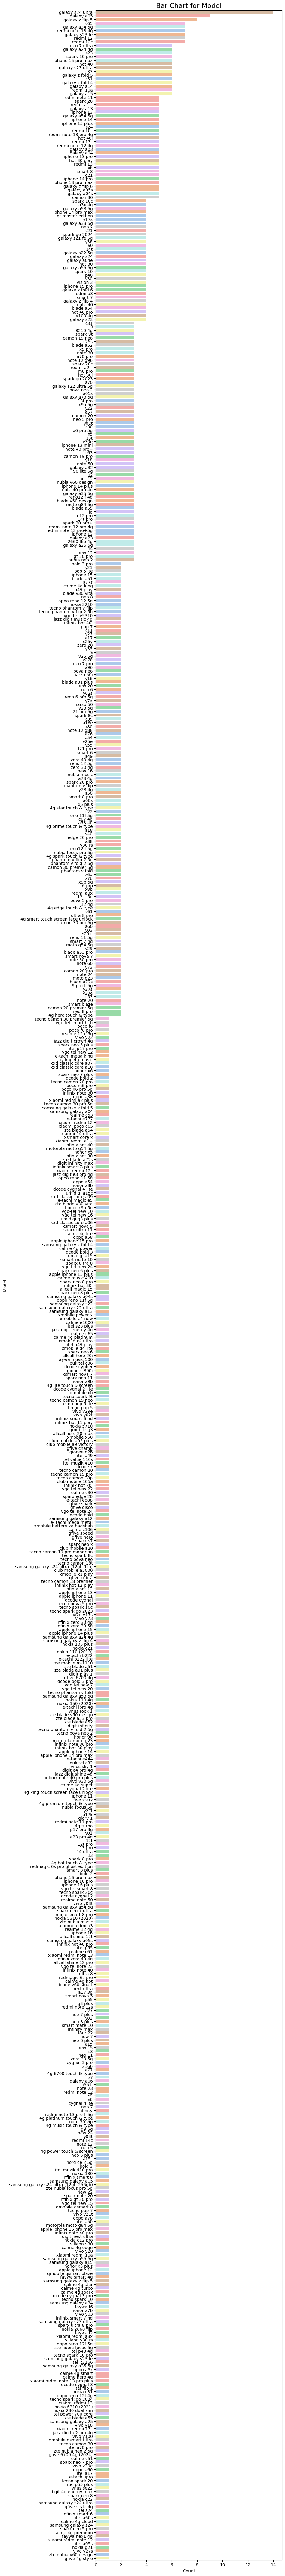

In [26]:
# Automatically identify categorical variables
categorical_vars = products.select_dtypes(include=['object']).columns

# Plot bar charts for each categorical variable
# FOR ALL CATEGORIES
for col in categorical_vars:
    plt.figure(figsize=(8, 110))
    sns.countplot(
        y=products[col],
        order=products[col].value_counts().index,
        hue=products[col],
        palette='pastel',
        dodge=False  # To avoid creating separate bars for each hue
    )

# for col in categorical_vars:
#     value_counts = products[col].value_counts()
#     plt.figure(figsize=(8, 5))
#     sns.barplot(
#         y=value_counts.index[:30],  # Show only top 20 categories
#         x=np.log1p(value_counts.values[:30]),  # Apply log transformation
#         palette='pastel'
#     )


    plt.title(f"Bar Chart for {col}", fontsize=16)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.legend([], [], frameon=False)  # Hide legend as hue isn't being used visually
    plt.show()

# **Bivariate**

<Figure size 1500x1000 with 0 Axes>

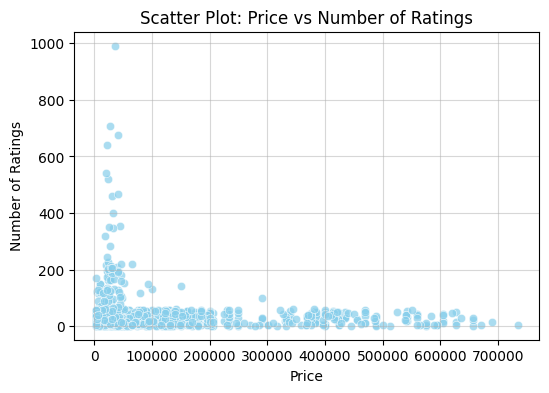

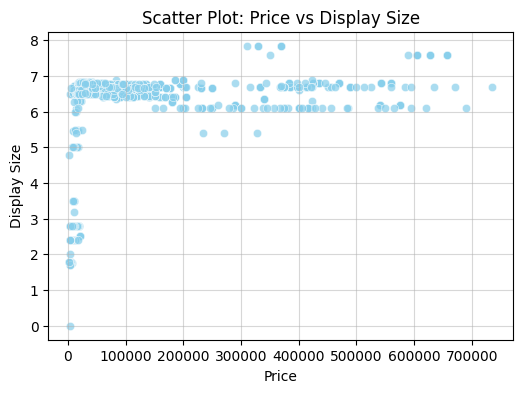

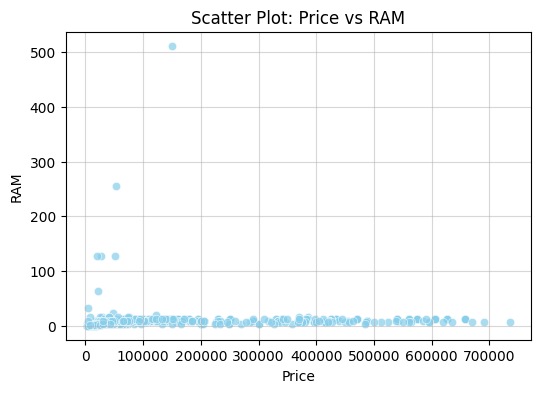

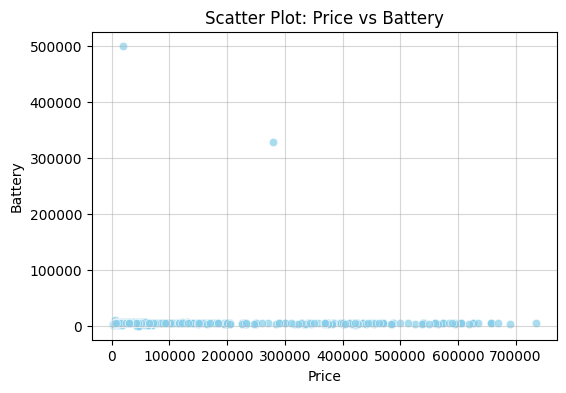

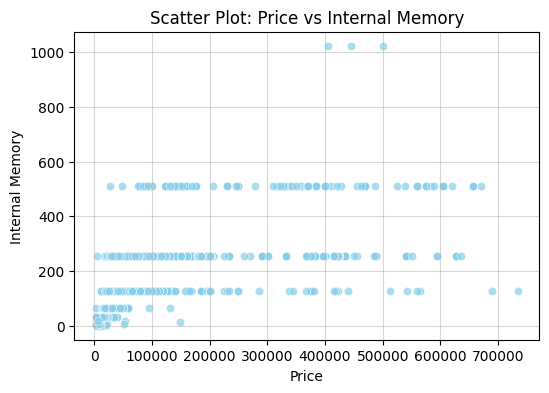

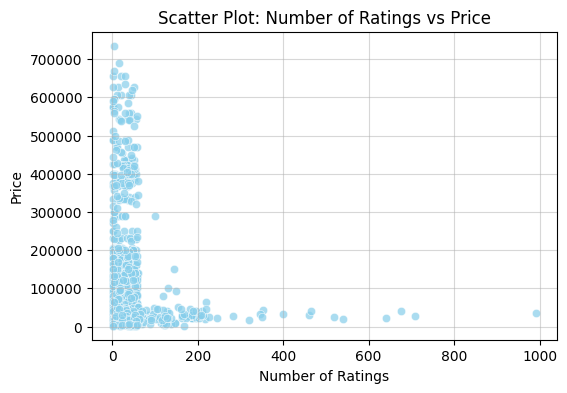

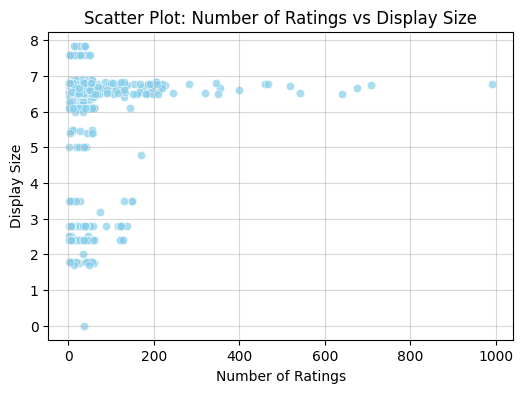

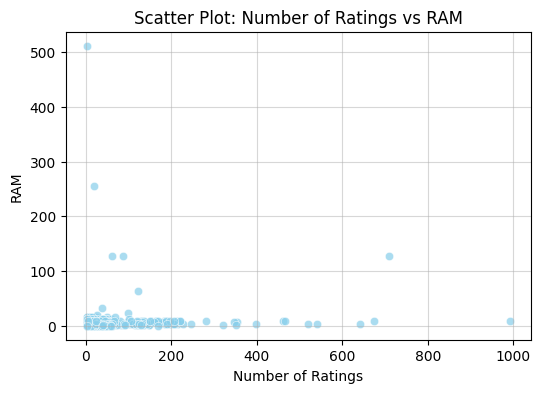

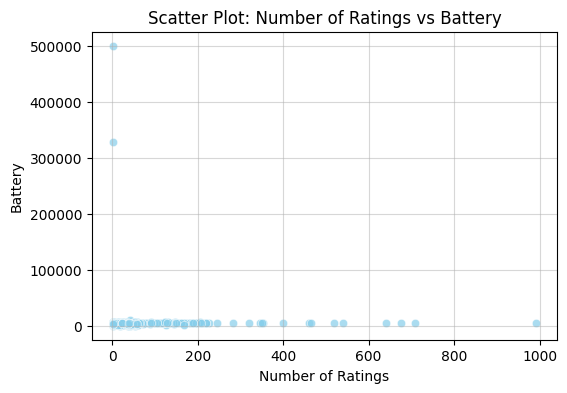

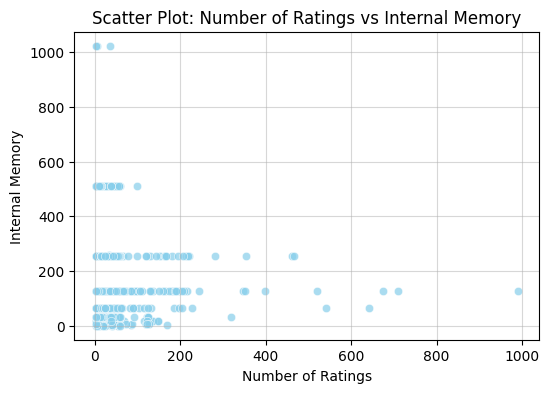

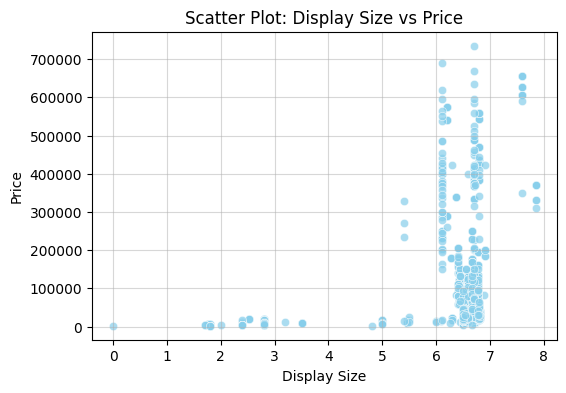

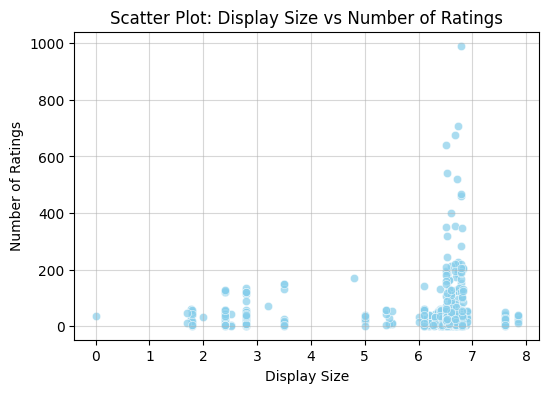

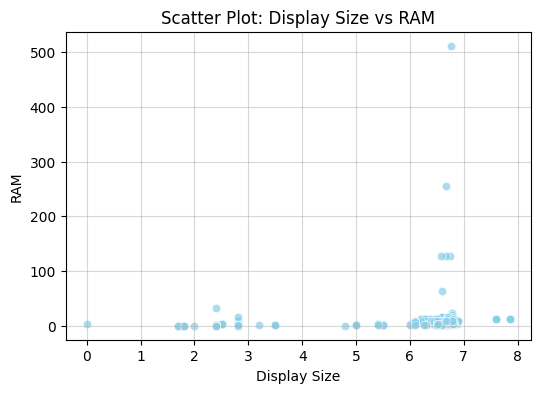

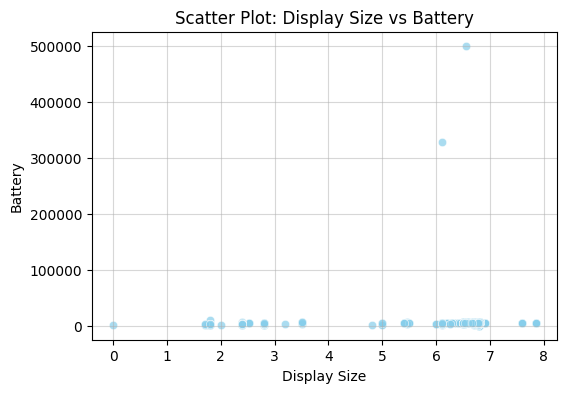

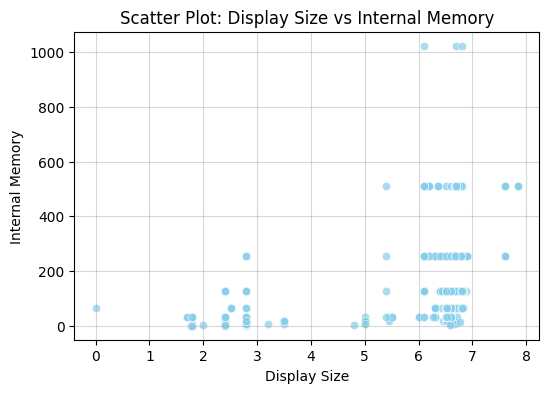

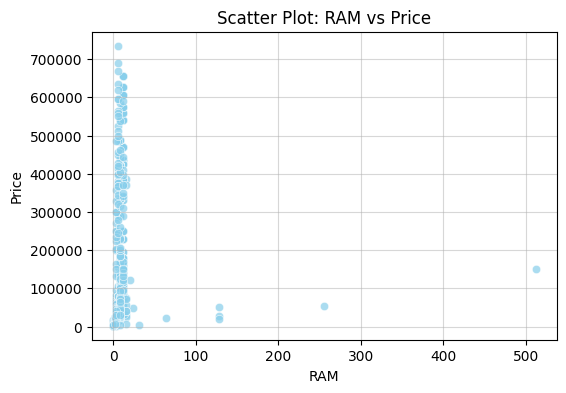

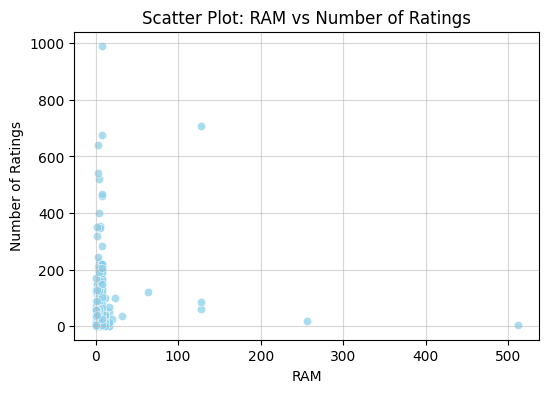

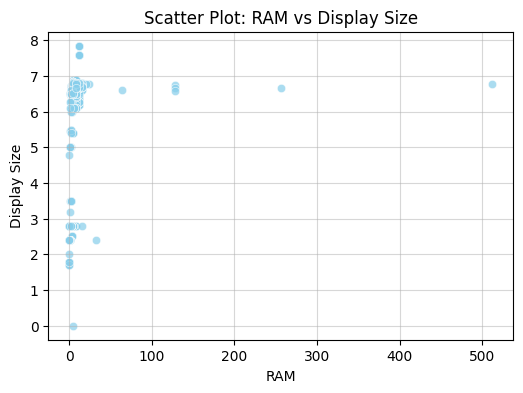

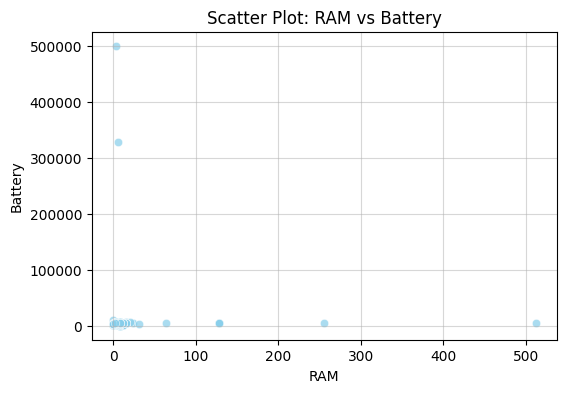

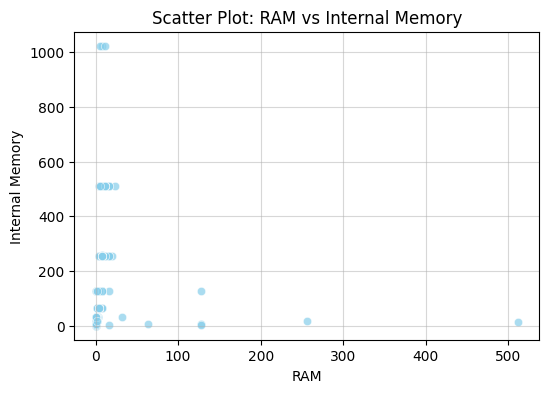

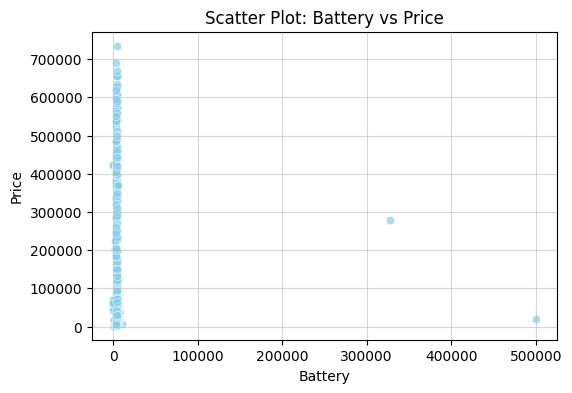

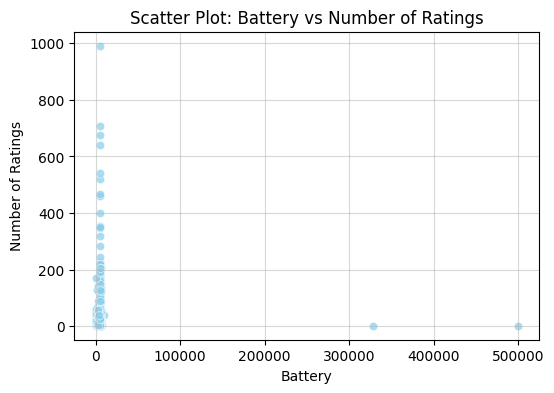

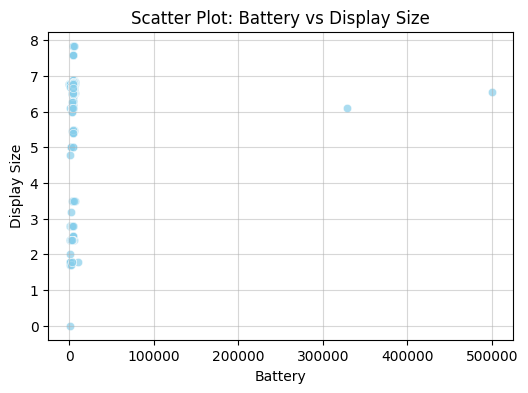

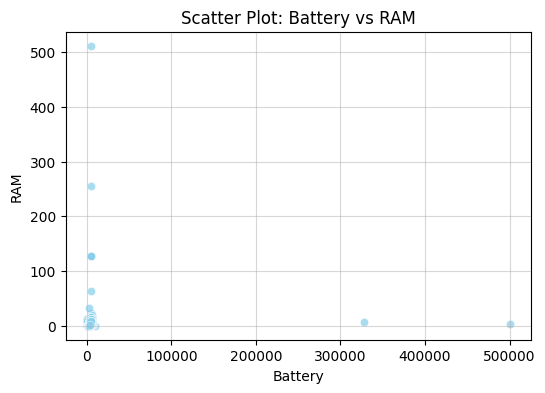

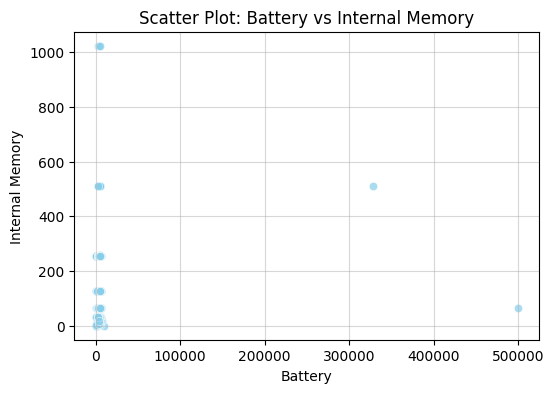

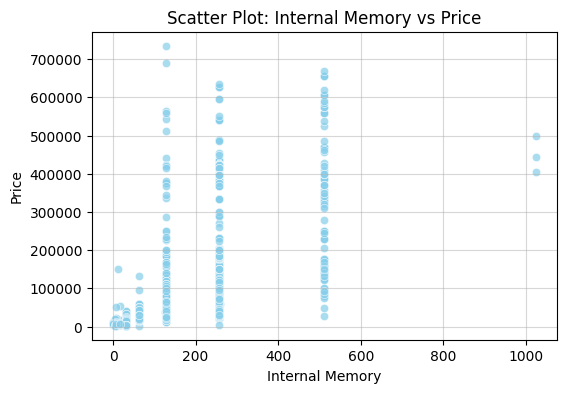

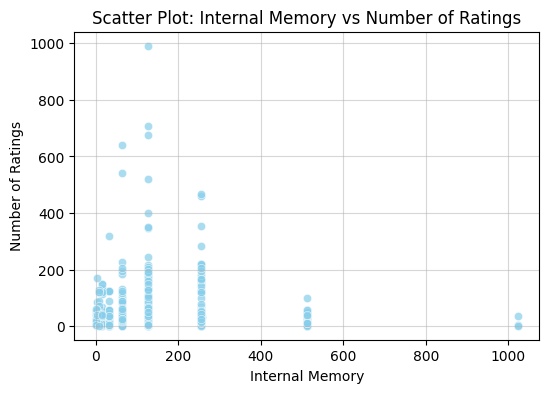

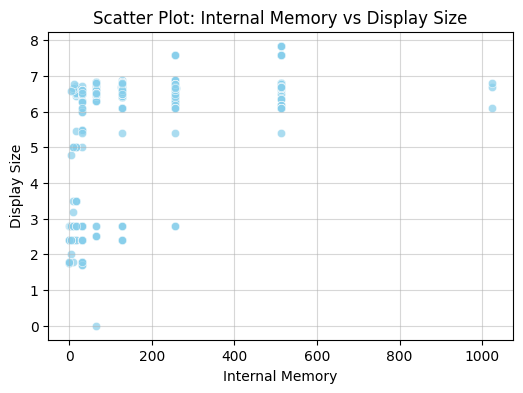

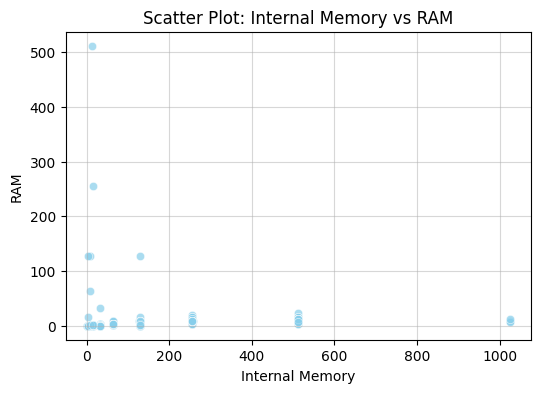

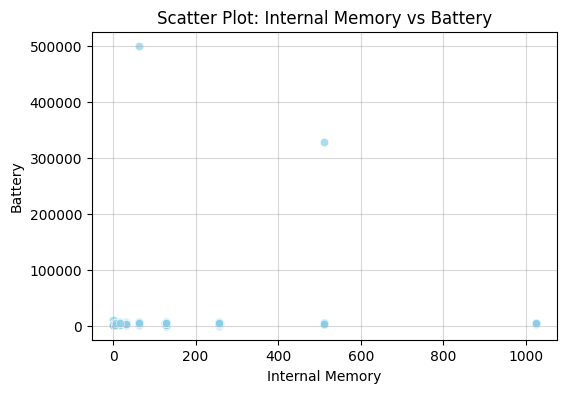

In [27]:
# Automatically identify continuous variables (numeric columns)
continuous_vars = products.select_dtypes(include=['float64', 'int64']).columns

# Pairwise scatter plots for bivariate analysis
plt.figure(figsize=(15, 10))
for i, col1 in enumerate(continuous_vars):
    for j, col2 in enumerate(continuous_vars):
        if col1 != col2:  # Avoid self-comparison
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=products, x=col1, y=col2, color='skyblue', alpha=0.7)
            plt.title(f"Scatter Plot: {col1} vs {col2}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid(alpha=0.5)
            plt.show()


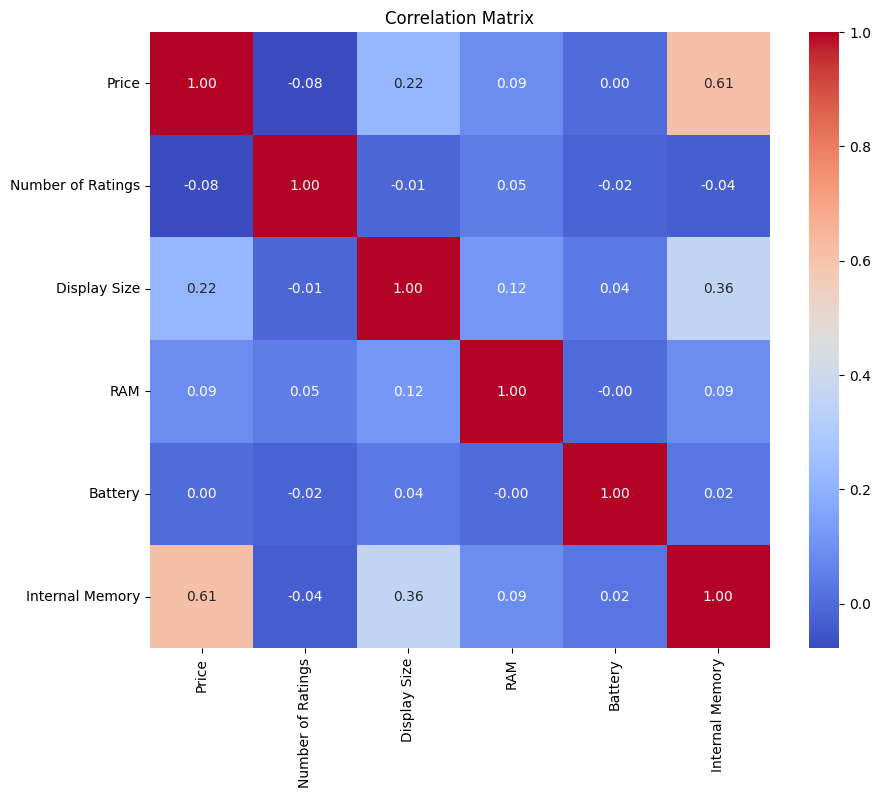

In [28]:
correlation_matrix = products[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# **Multivariate**

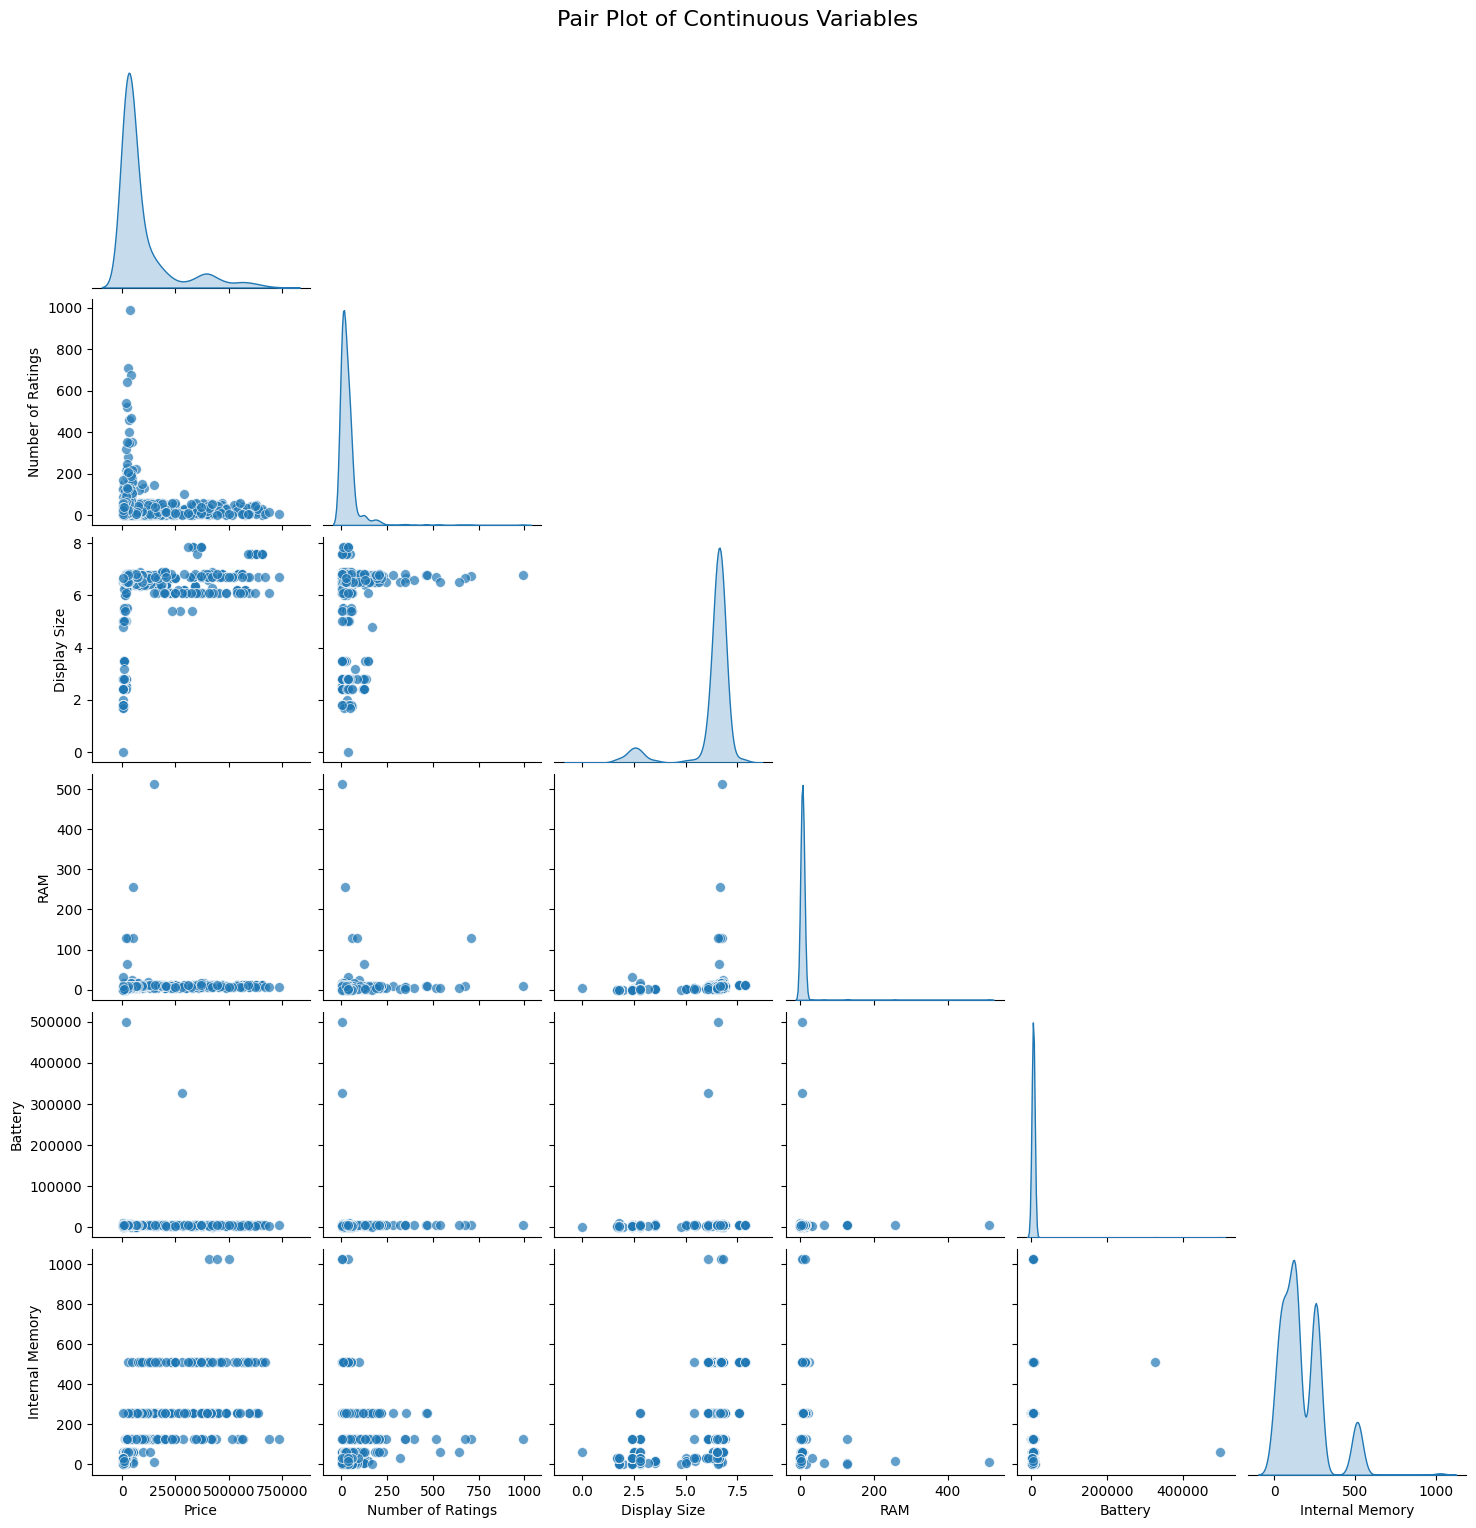

In [29]:
# Automatically identify continuous variables (numeric columns)
continuous_vars = products.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot for continuous variables
sns.pairplot(
    products[continuous_vars],
    diag_kind="kde",
    corner=True,
    plot_kws={'alpha': 0.7, 's': 50},
    diag_kws={'fill': True}  # Replace 'shade' with 'fill'
)
plt.suptitle("Pair Plot of Continuous Variables", y=1.02, fontsize=16)
plt.show()

# Feature **Analysis**


Correlations with the target variable 'Price':
Internal Memory    0.610106
Display Size       0.220257
RAM                0.089446
Battery            0.001517
dtype: float64


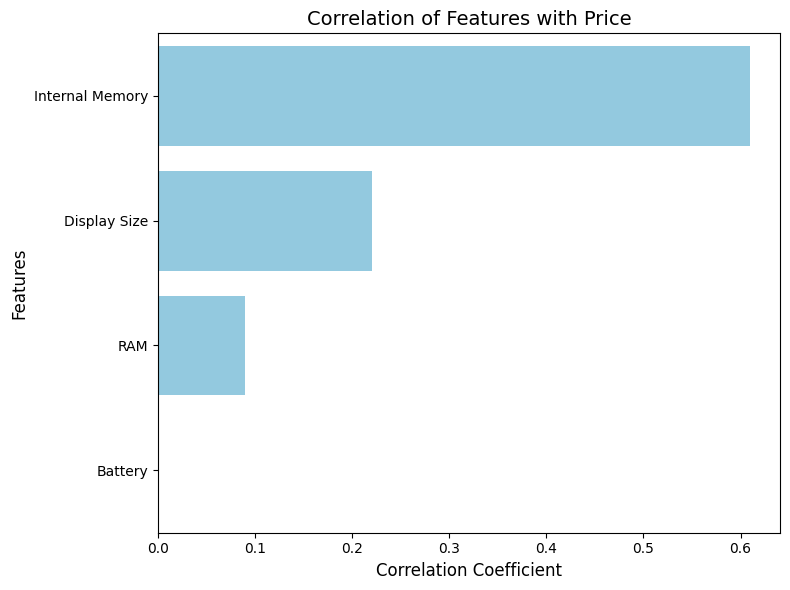


Correlations with the target variable 'Number of Ratings':
RAM                0.045127
Display Size      -0.014012
Battery           -0.017938
Internal Memory   -0.035544
dtype: float64


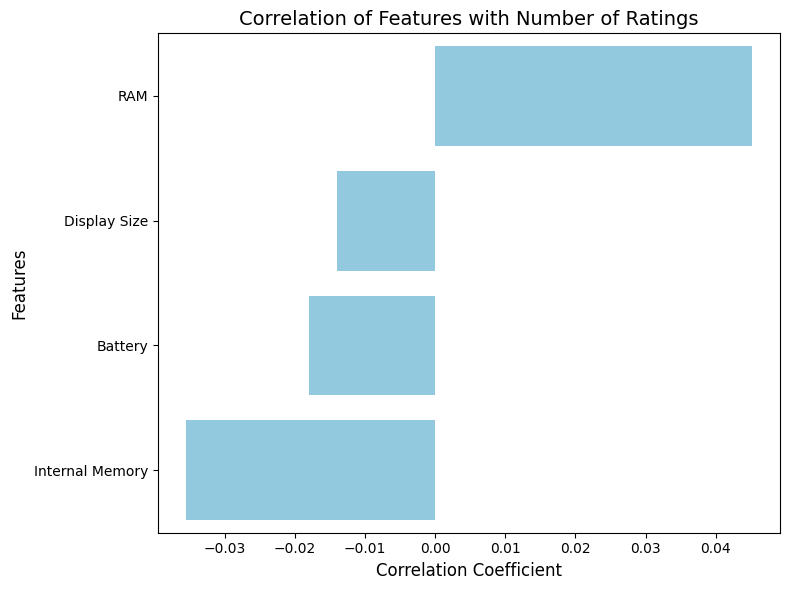

In [30]:
# Define target variables
target_variables = ['Price', 'Number of Ratings']

# Select continuous features
continuous_vars = products.select_dtypes(include=['float64', 'int64']).columns.drop(target_variables)

# Calculate correlations for each target variable
correlation_results = {}
for target in target_variables:
    correlations = products[continuous_vars].corrwith(products[target]).sort_values(ascending=False)
    correlation_results[target] = correlations

    # Display correlations
    print(f"\nCorrelations with the target variable '{target}':")
    print(correlations)

    # Plot correlations
    plt.figure(figsize=(8, 6))
    sns.barplot(x=correlations.values, y=correlations.index, color='skyblue')  # Avoid using 'palette' without 'hue'
    plt.title(f"Correlation of Features with {target}", fontsize=14)
    plt.xlabel("Correlation Coefficient", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.tight_layout()
    plt.show()



Group-by summary for 'Brand' and target 'Price':
                      mean    median
Brand                               
apple        413246.709443  415500.0
samsung      223514.057283  140000.0
oneplus      122000.000000  122000.0
poco         102894.736842  110000.0
xiaomi        84133.408019   50000.0
honor         77472.000000   67899.5
oppo          76608.093948   65500.0
tecno         71846.619469   41999.0
vivo          69893.477344   56500.0
motorola      49349.700000   41749.5
infinix       47674.140000   38500.0
realme        47018.724638   40000.0
zte           35078.176471   22499.0
umidigi       34513.857143   35199.0
huawei        33700.000000   33700.0
dcode         29183.578947   25500.0
sparx         24479.551724   23899.5
oukitel       23199.000000   23199.0
itel          22352.046875   22249.5
x             21500.000000   21500.0
q             21000.000000   21000.0
xsmart        20249.000000   20449.0
villaon       19874.666667   20174.5
kxd           19861.50000

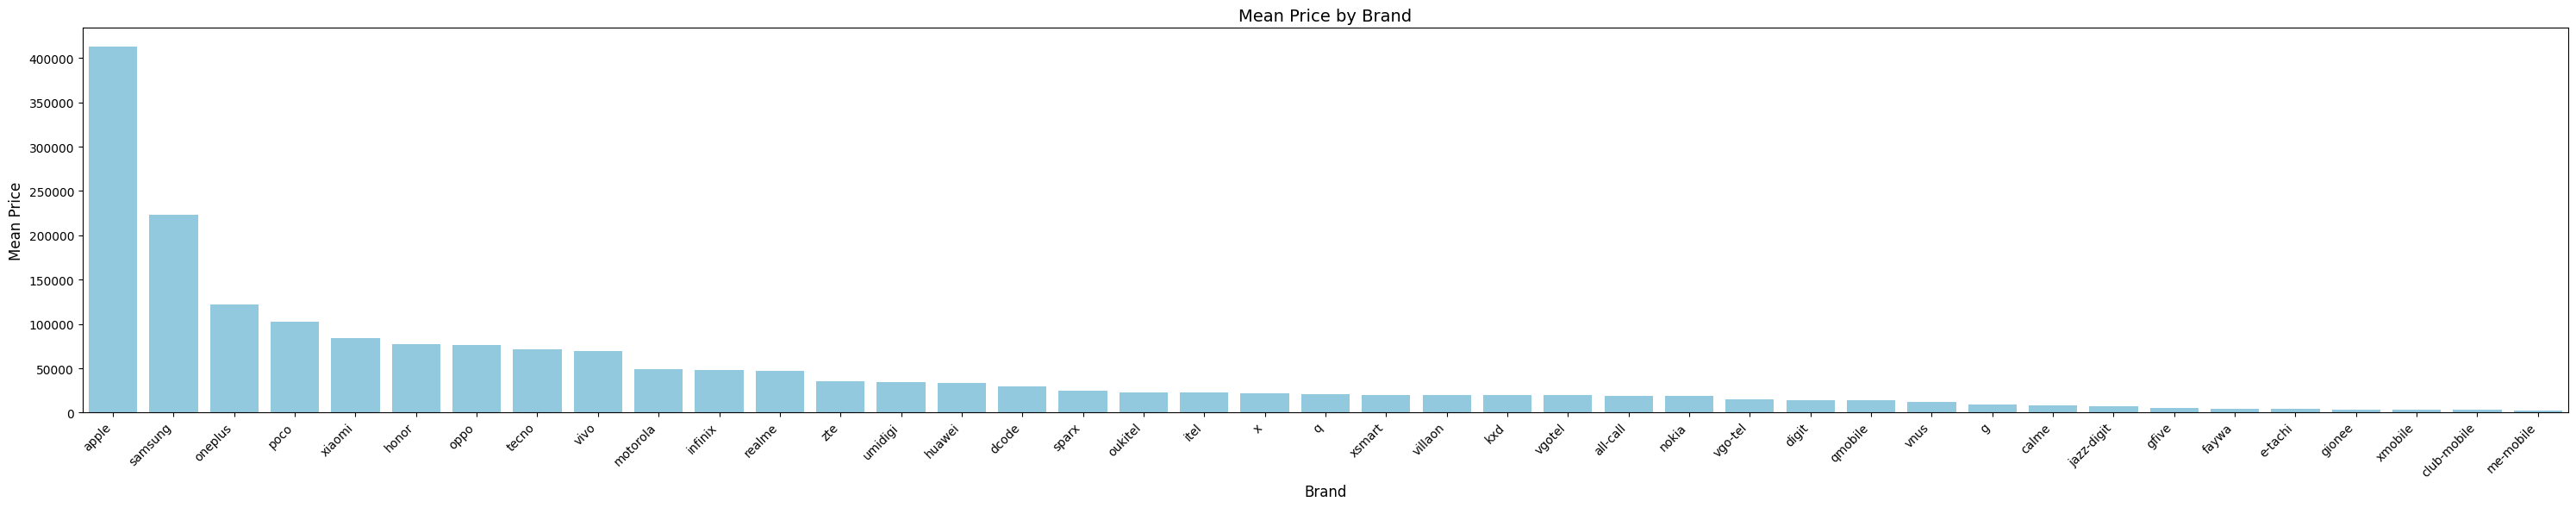


Group-by summary for 'Brand' and target 'Number of Ratings':
                  mean  median
Brand                         
jazz-digit   74.000000    57.0
calme        73.641026    58.0
vgo-tel      66.928571    41.5
xiaomi       55.000000    12.0
sparx        52.517241    24.5
gionee       49.000000    49.0
me-mobile    45.000000    45.0
infinix      43.740000    16.0
gfive        41.454545    39.0
poco         38.210526    39.0
tecno        37.681416    15.0
umidigi      37.428571    46.0
samsung      36.860697    26.0
xmobile      36.857143    37.0
all-call     36.200000    37.0
motorola     34.900000    32.5
digit        34.428571    23.5
vgotel       33.588235    33.0
honor        32.083333    35.0
q            31.666667    30.0
zte          29.058824    22.0
g            28.000000    28.0
e-tachi      27.100000    29.0
apple        26.785714    23.5
club-mobile  26.600000    33.0
oppo         24.450000    15.5
nokia        23.684211    13.0
itel         23.250000    15.0
kxd     

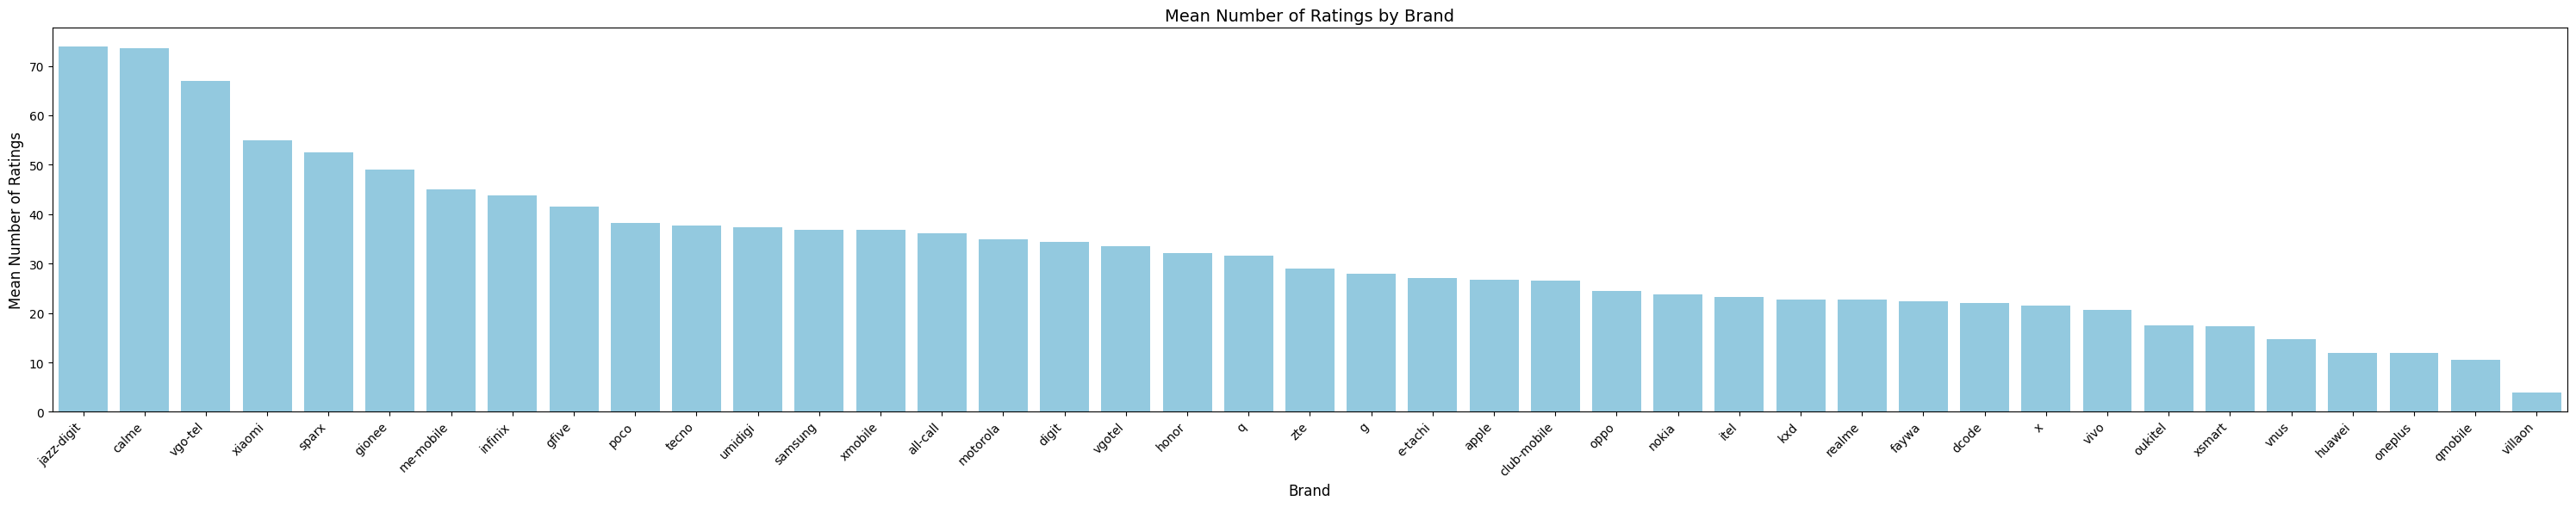


Group-by summary for 'Model' and target 'Price':
                             mean    median
Model                                      
galaxy z fold 5          642000.0  642000.0
iphone 14 pro max        640000.0  632500.0
galaxy z fold 6          605000.0  605000.0
iphone 14 pro            604000.0  595000.0
samsung galaxy z fold 5  589399.0  589399.0
...                           ...       ...
faywa f2                   2449.0    2449.0
faywa f6                   2399.0    2399.0
gfive spark                2325.0    2325.0
me mobile m-1110           2299.0    2299.0
calme c106                 2250.0    2250.0

[689 rows x 2 columns]


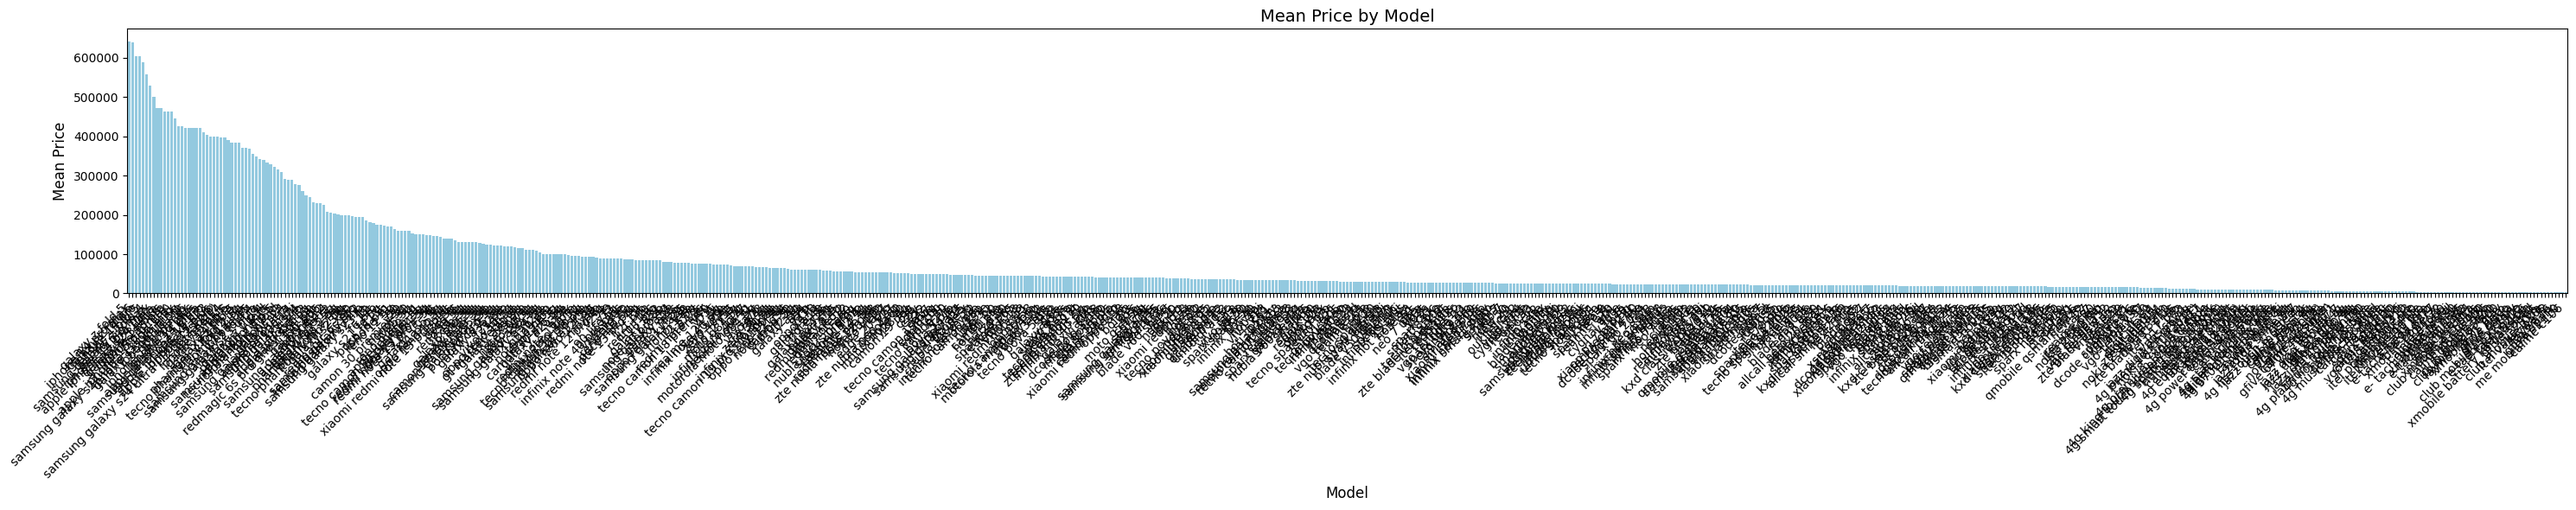


Group-by summary for 'Model' and target 'Number of Ratings':
                       mean  median
Model                              
xiaomi redmi 12       991.0   991.0
xiaomi redmi 13c      709.0   709.0
xiaomi redmi note 12  675.0   675.0
samsung galaxy a04    641.0   641.0
xiaomi redmi a2 plus  541.0   541.0
...                     ...     ...
faywa f6                2.0     2.0
y03t                    2.0     2.0
apple iphone 14         2.0     2.0
honor x7b               2.0     2.0
itel s23 plus           2.0     2.0

[689 rows x 2 columns]


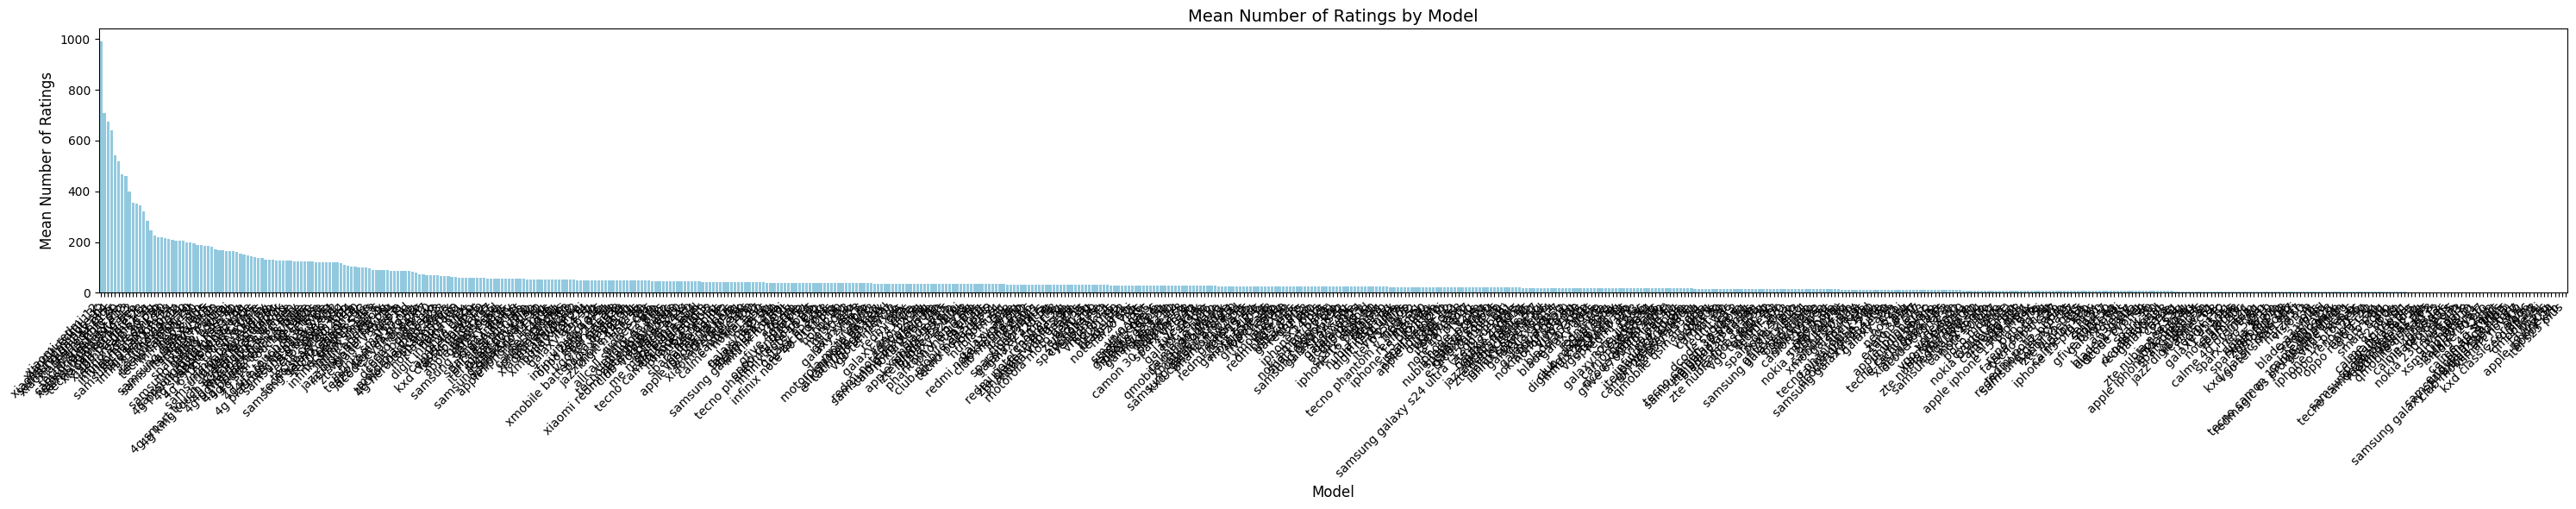

In [31]:
# Define categorical variables
categorical_vars = products.select_dtypes(include=['object']).columns

# Define target variables
target_variables = ['Price', 'Number of Ratings']

# Compute and visualize group-by summaries
for cat_var in categorical_vars:
    for target in target_variables:
        # Group by category and compute mean and median
        summary = products.groupby(cat_var)[target].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

        # Display summary statistics
        print(f"\nGroup-by summary for '{cat_var}' and target '{target}':")
        print(summary)

        # Plot mean values by category
        plt.figure(figsize=(30, 6))
        sns.barplot(x=summary.index, y=summary['mean'], color='skyblue')
        plt.title(f"Mean {target} by {cat_var}", fontsize=14)
        plt.xlabel(cat_var, fontsize=12)
        plt.ylabel(f"Mean {target}", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


In [32]:
# products.to_csv("data.csv", index=False)  # index=False avoids writing row indices
# print("DataFrame saved to 'products_data.csv'")

DataFrame saved to 'products_data.csv'


# **Outliers Removal**

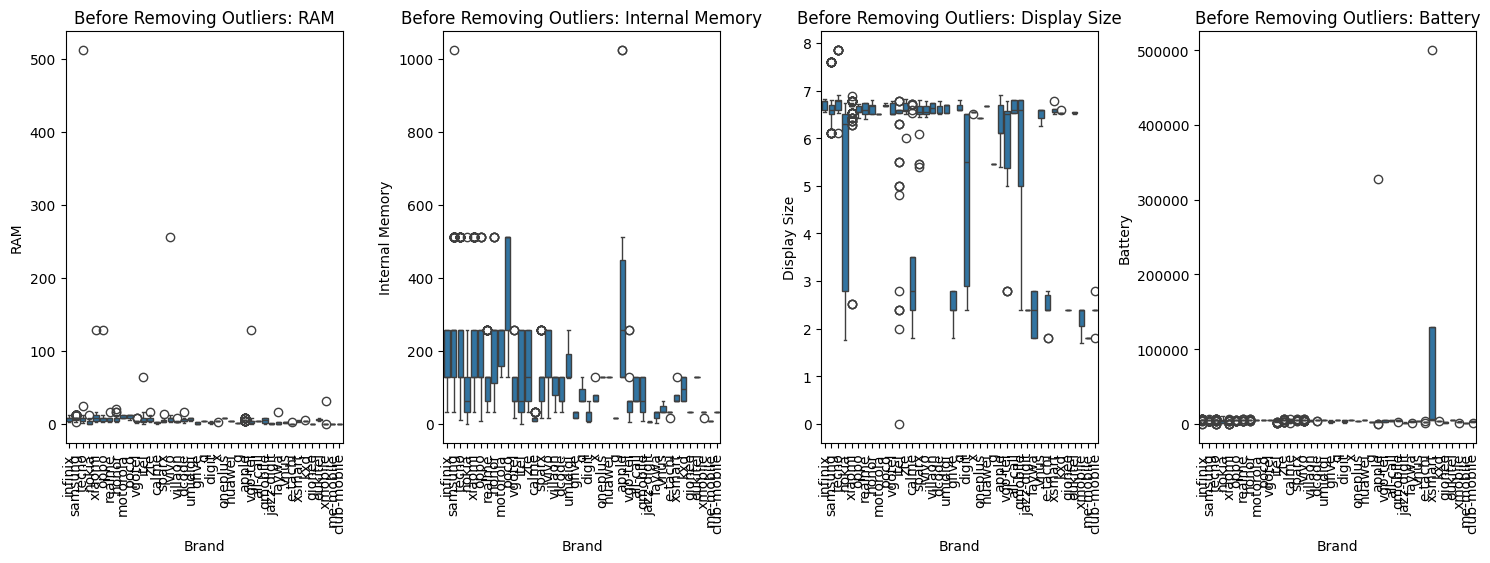


Outliers Count Before Handling:
{'RAM': 104, 'Internal Memory': 125, 'Display Size': 113, 'Battery': 198}

Outliers Count After Handling:
{'RAM': 0, 'Internal Memory': 0, 'Display Size': 0, 'Battery': 0}


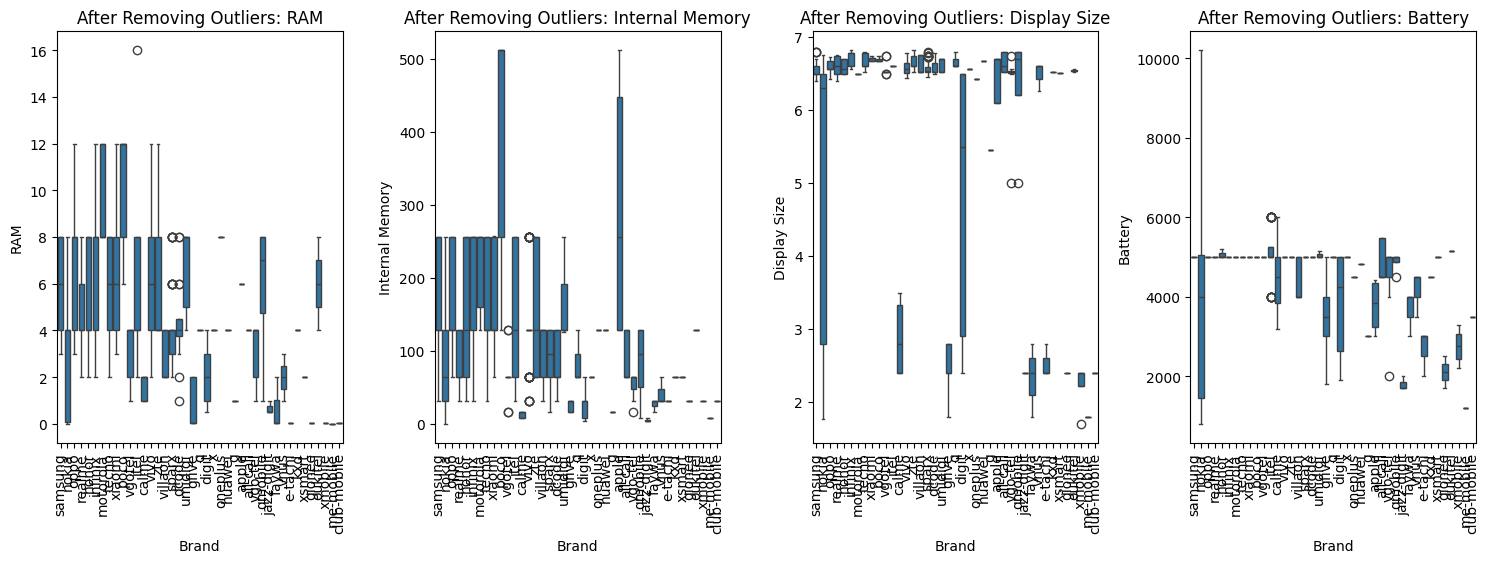

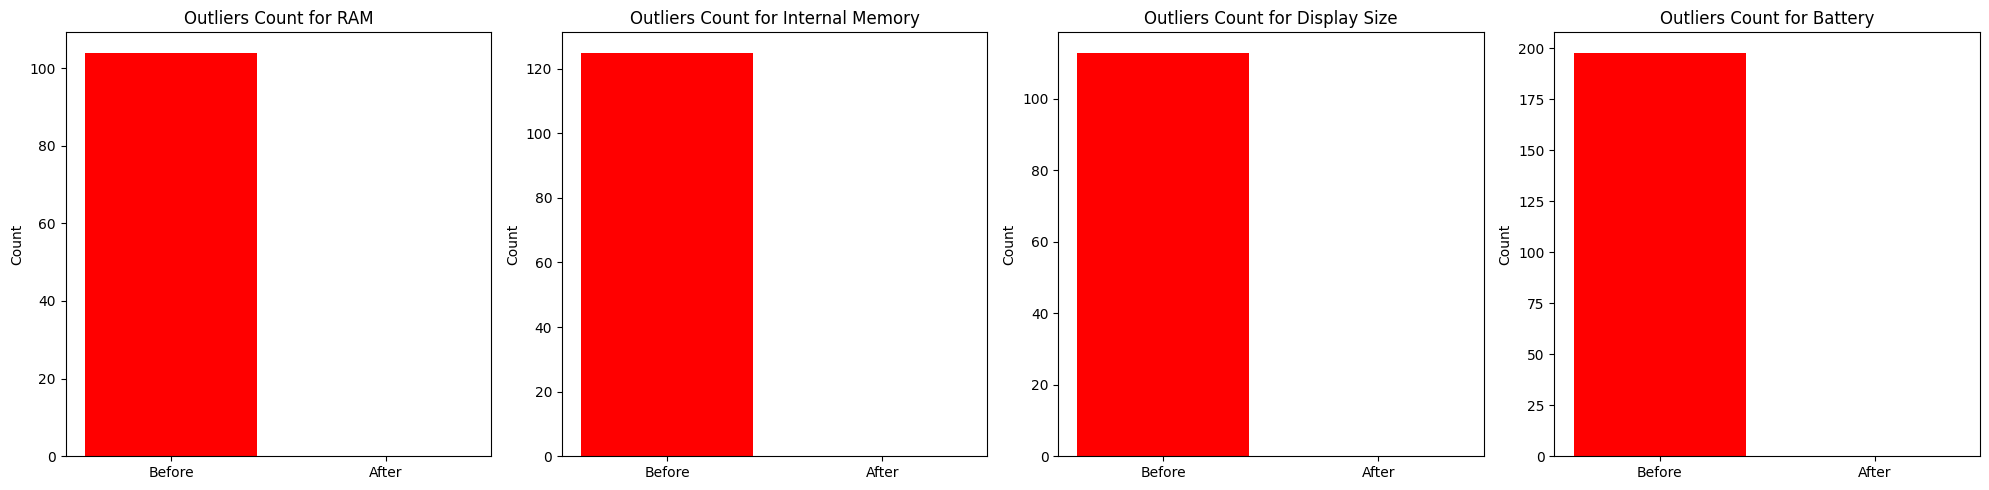

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to handle and count outliers by brand, modifying the original products DataFrame
def handle_outliers_and_count(products, columns, method='IQR', factor=0.):
    outlier_counts = {"before": {}, "after": {}}

    for column in columns:
        if method == 'IQR':
            # Calculate IQR for each group (brand)
            grouped = products.groupby('Brand')[column]
            Q1 = grouped.transform(lambda x: x.quantile(0.25))
            Q3 = grouped.transform(lambda x: x.quantile(0.75))
            IQR = Q3 - Q1

            # Define the upper and lower bounds for each group (brand)
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR

            # Count outliers before handling
            outlier_counts["before"][column] = ((products[column] < lower_bound) | (products[column] > upper_bound)).sum()

            # Remove outliers by setting them to NaN in the original dataframe
            products[column] = products[column].where(
                (products[column] >= lower_bound) & (products[column] <= upper_bound)
            )

            # Count remaining outliers after handling
            outlier_counts["after"][column] = (
                ((products[column] < lower_bound) | (products[column] > upper_bound)).sum()
            )

    # Drop rows with NaN values (i.e., rows with outliers removed)
    products.dropna(subset=columns, inplace=True)

    return outlier_counts

# Columns to check for outliers
columns_to_check = ['RAM', 'Internal Memory', 'Display Size', 'Battery']

# Before handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=products, x='Brand', y=col)
    plt.title(f"Before Removing Outliers: {col}")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Apply outlier handling directly on the 'products' DataFrame
outlier_counts = handle_outliers_and_count(
    products, columns_to_check, method='IQR', factor=1.5
)

# Print outlier counts
print("\nOutliers Count Before Handling:")
print(outlier_counts["before"])

print("\nOutliers Count After Handling:")
print(outlier_counts["after"])

# Boxplots for After Outlier Handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=products, x='Brand', y=col)
    plt.title(f"After Removing Outliers: {col}")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Outlier Counts
fig, ax = plt.subplots(1, len(columns_to_check), figsize=(20, 5))
for idx, column in enumerate(columns_to_check):
    ax[idx].bar(['Before', 'After'], [outlier_counts["before"][column], outlier_counts["after"][column]], color=['red', 'green'])
    ax[idx].set_title(f"Outliers Count for {column}")
    ax[idx].set_ylabel("Count")
plt.tight_layout()
plt.show()


In [34]:
print(products.isnull().sum())
print(products.info())
print(products.describe())

# products.to_csv("productsData.csv", index=False)  # index=False avoids writing row indices
# print("DataFrame saved to 'products_data.csv'")

Brand                0
Model                0
Price                0
Number of Ratings    0
Display Size         0
RAM                  0
Battery              0
Internal Memory      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 3 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              888 non-null    object 
 1   Model              888 non-null    object 
 2   Price              888 non-null    float64
 3   Number of Ratings  888 non-null    int64  
 4   Display Size       888 non-null    float64
 5   RAM                888 non-null    float64
 6   Battery            888 non-null    float64
 7   Internal Memory    888 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 62.4+ KB
None
               Price  Number of Ratings  Display Size         RAM  \
count     888.000000         888.000000    888.000000  888.000000   
mean    65464.687

# **PHASE 3**

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
# print(products.head())
products.drop('Number of Ratings', axis=1, inplace=True)
products.drop('Model', axis=1, inplace=True)

print(products.head())


      Brand     Price  Display Size   RAM  Battery  Internal Memory
3   samsung   25000.0          6.70   4.0   5000.0             64.0
6     nokia   30000.0          6.50   8.0   5050.0            256.0
10     oppo  130000.0          6.70  12.0   5000.0            256.0
16   realme   27000.0          6.74   4.0   5000.0             64.0
18    honor  160000.0          6.70   8.0   5000.0            256.0


In [37]:
object_columns = products.select_dtypes(include=['object']).columns
products[object_columns]

for column in object_columns:
    unique_values = products[column].unique()
    # print(f"Unique values in '{column}':")
    # print(unique_values)
    # print()


products1 = pd.get_dummies(products, columns=object_columns)
products1


products1.shape


(888, 46)

In [38]:
from sklearn.preprocessing import MinMaxScaler
# non_boolean_numerical_features = ['RAM', 'Battery', 'Price', 'Display Size', 'Internal Memory']
# scaler = MinMaxScaler()

# products1[non_boolean_numerical_features] = scaler.fit_transform(products1[non_boolean_numerical_features])

y_unscaled=products['Price']
y_unscaled

y_scaled = products1['Price']
y_scaled

x = products1.drop(['Price'],axis=1)
x


Display Size       RAM  Battery  Internal Memory  Brand_all-call  \
3             6.70   4.00000   5000.0             64.0           False   
6             6.50   8.00000   5050.0            256.0           False   
10            6.70  12.00000   5000.0            256.0           False   
16            6.74   4.00000   5000.0             64.0           False   
18            6.70   8.00000   5000.0            256.0           False   
...            ...       ...      ...              ...             ...   
1338          6.53   4.00000   5000.0             64.0           False   
1340          2.40   0.03125   3000.0             32.0           False   
1341          1.80   0.03125   3000.0             32.0           False   
1342          2.80   0.03125   3000.0             32.0           False   
1344          2.80   2.00000   4000.0             16.0           False   

      Brand_apple  Brand_calme  Brand_club-mobile  Brand_dcode  Brand_digit  \
3           False        False              False        False        False   
6           False        False              False        False        False   
10          False        False              False        False        False   
16          False        False              False        False        False   
18          False        False              False        False        False   
...           ...          ...                ...          ...          ...   
1338        False        False              False         True        False   
1340        False        False              False        False        False   
1341        False        False              False        False        False   
1342        False        False              False        False        False   
1344        False        False              False        False        False   

      ...  Brand_vgo-tel  Brand_vgotel  Brand_villaon  Brand_vivo  Brand_vnus  \
3     ...          False         False          False       False       False   
6     ...          False         False          False       False       False   
10    ...          False         False          False       False       False   
16    ...          False         False          False       False       False   
18    ...          False         False          False       False       False   
...   ...            ...           ...            ...         ...         ...   
1338  ...          False         False          False       False       False   
1340  ...          False         False          False       False       False   
1341  ...          False         False          False       False       False   
1342  ...          False         False          False       False       False   
1344  ...          False         False          False       False       False   

      Brand_x  Brand_xiaomi  Brand_xmobile  Brand_xsmart  Brand_zte  
3       False         False          False         False      False  
6       False         False          False         False      False  
10      False         False          False         False      False  
16      False         False          False         False      False  
18      False         False          False         False      False  
...       ...           ...            ...           ...        ...  
1338    False         False          False         False      False  
1340    False         False          False         False      False  
1341    False         False          False         False      False  
1342    False         False          False         False      False  
1344    False         False          False         False      False  

[888 rows x 45 columns]

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_unscaled, test_size=0.2, random_state=42)
X_train

Display Size      RAM  Battery  Internal Memory  Brand_all-call  \
1051         6.500  4.00000   5000.0            128.0           False   
378          6.740  4.00000   5000.0            128.0           False   
560          6.500  3.00000   5000.0             32.0           False   
1185         2.400  0.03125   3000.0             32.0           False   
1015         6.560  4.00000   5000.0            128.0           False   
...            ...      ...      ...              ...             ...   
182          6.517  2.00000   5000.0             64.0           False   
421          6.700  4.00000   5000.0            128.0           False   
1303         2.400  0.03125   3500.0             32.0           False   
639          6.517  3.00000   5000.0             32.0           False   
176          6.670  8.00000   5000.0            256.0           False   

      Brand_apple  Brand_calme  Brand_club-mobile  Brand_dcode  Brand_digit  \
1051        False        False              False        False        False   
378         False        False              False        False        False   
560         False        False              False        False         True   
1185        False        False              False        False        False   
1015        False        False              False        False        False   
...           ...          ...                ...          ...          ...   
182         False        False              False        False        False   
421         False        False              False        False        False   
1303        False        False               True        False        False   
639         False        False              False        False        False   
176         False        False              False        False        False   

      ...  Brand_vgo-tel  Brand_vgotel  Brand_villaon  Brand_vivo  Brand_vnus  \
1051  ...          False         False          False       False       False   
378   ...          False         False          False       False       False   
560   ...          False         False          False       False       False   
1185  ...          False         False          False       False       False   
1015  ...          False         False          False        True       False   
...   ...            ...           ...            ...         ...         ...   
182   ...          False          True          False       False       False   
421   ...          False         False          False       False       False   
1303  ...          False         False          False       False       False   
639   ...          False         False          False       False       False   
176   ...          False         False          False        True       False   

      Brand_x  Brand_xiaomi  Brand_xmobile  Brand_xsmart  Brand_zte  
1051    False         False          False         False      False  
378     False         False          False         False      False  
560     False         False          False         False      False  
1185    False         False           True         False      False  
1015    False         False          False         False      False  
...       ...           ...            ...           ...        ...  
182     False         False          False         False      False  
421     False         False          False         False      False  
1303    False         False          False         False      False  
639     False         False          False         False      False  
176     False         False          False         False      False  

[710 rows x 45 columns]

In [40]:
y_train


1051    22999.0
378     23500.0
560     25000.0
1185     3899.0
1015    33099.0
         ...   
182     16700.0
421     30000.0
1303     3099.0
639     17000.0
176     67000.0
Name: Price, Length: 710, dtype: float64

# Linear **Regression**

In [41]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)


# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2087800446.437631
Testing MSE: 1289060338.6193376
Training R2 Score: 0.8026526040765232
Testing R2 Score: 0.8315313197274885


# Decision **Tree**

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)


y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training MSE: 377127006.1974471
Testing MSE: 811136138.8869915
Training R2 Score: 0.9643524203989549
Testing R2 Score: 0.8939917467432179


# **Random** Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)


# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training MSE: 374865775.56804836
Testing MSE: 643466664.671178
Training R2 Score: 0.964566161121664
Testing R2 Score: 0.9159046504272909


# **XGBoost**

In [44]:
from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


# Save the trained Random Forest model to a file
import pickle
with open('xgb_regressor.pkl', 'wb') as file:
    pickle.dump(best_xgb_regressor, file)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Training MSE: 484073262.61027056
Testing MSE: 756802143.8325086
Training R2 Score: 0.9542434249521692
Testing R2 Score: 0.901092714918661


In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Initialize an empty list to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})

# Create DataFrame from results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

Model  Training MSE   Testing MSE  Training R2 Score  \
0  Linear Regression  2.087800e+09  1.289060e+09           0.802653   
1      Decision Tree  3.247470e+08  9.794180e+08           0.969304   
2      Random Forest  3.530638e+08  6.546898e+08           0.966627   
3            XGBoost  3.261236e+08  6.724264e+08           0.969173   

   Testing R2 Score  
0          0.831531  
1          0.871999  
2          0.914438  
3          0.912120

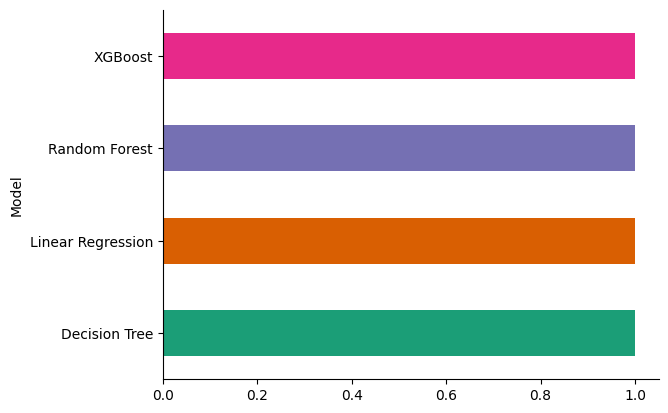

In [46]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

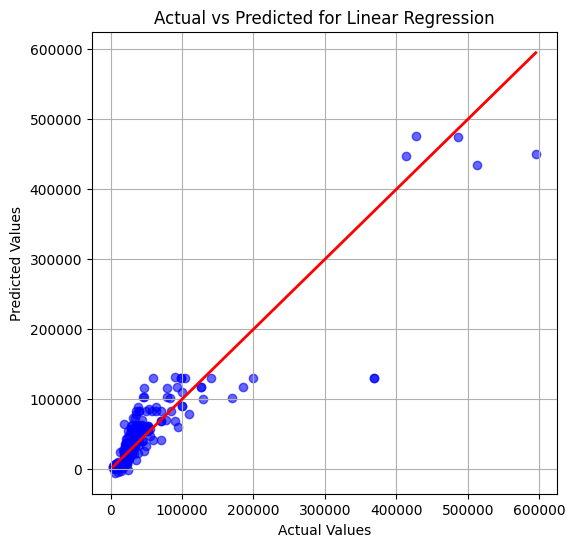

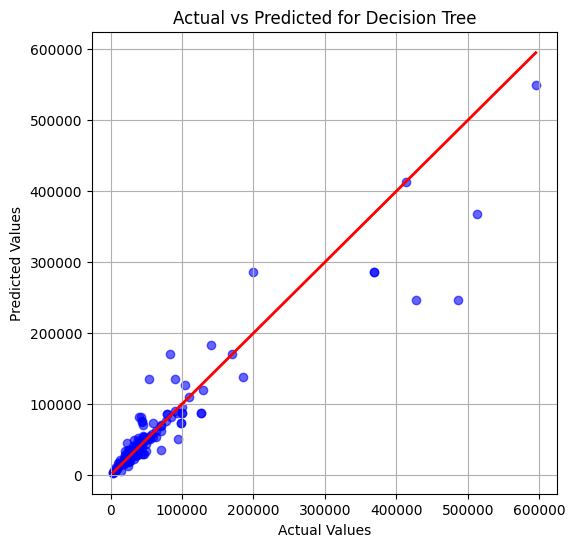

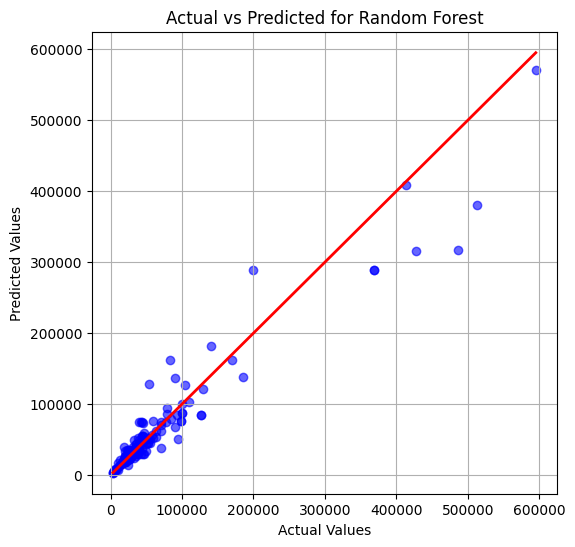

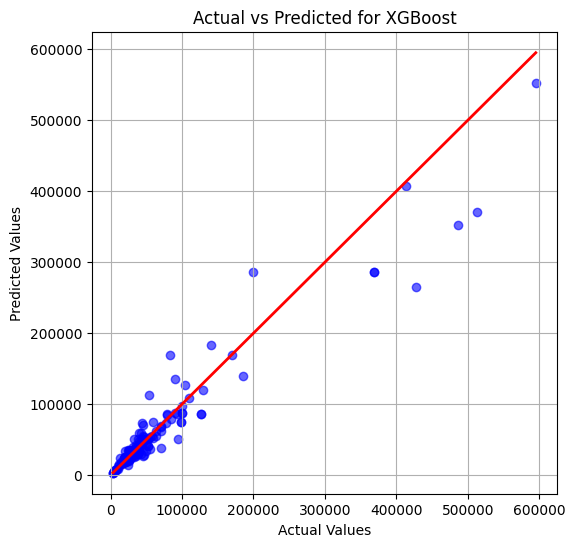

               Model  Training MSE   Testing MSE  Training R2 Score  \
0  Linear Regression  2.087800e+09  1.289060e+09           0.802653   
1      Decision Tree  3.247470e+08  9.794180e+08           0.969304   
2      Random Forest  3.530638e+08  6.546898e+08           0.966627   
3            XGBoost  3.261236e+08  6.724264e+08           0.969173   

   Testing R2 Score  
0          0.831531  
1          0.871999  
2          0.914438  
3          0.912120  


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Initialize an empty list to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})

    # Plotting actual vs predicted for the test set
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect predictions
    plt.title(f'Actual vs Predicted for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Create DataFrame from results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


In [48]:
# Load the trained model
import pickle
best_xgb_regressor = pickle.load(open('xgb_regressor.pkl', 'rb'))

# Define the new input data
new_data = pd.DataFrame({
    'Brand': ['realme'],  # Replace with the appropriate brand
    'RAM': [4.0],
    'Internal Memory': [64],
    'Battery': [5000],
    'Display Size': [6.74]
})

# Apply one-hot encoding to match the training data
new_data_encoded = pd.get_dummies(new_data, columns=['Brand'])

# Ensure the columns align with the training data
for col in best_xgb_regressor.feature_names_in_:  # `feature_names_in_` stores expected feature names
    if col not in new_data_encoded:
        new_data_encoded[col] = 0  # Add missing columns with zero values

# Ensure the columns are in the same order as the training data
new_data_encoded = new_data_encoded[best_xgb_regressor.feature_names_in_]

# Make the prediction
prediction = best_xgb_regressor.predict(new_data_encoded)

print("Predicted Price:", prediction)

Predicted Price: [25122.25]


# **DEEP LEARNING**

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pickle

# Assume your DataFrame is called 'products'
# Cleaned and ready with features: Price, RAM, Internal Memory, Display Size, Battery, and Brand

# Feature Engineering: Adding interaction features and polynomial features
X = products.drop(columns=['Price'])
y = products['Price']

# Add interaction terms between RAM and Battery, Display Size and RAM
X['RAM_Battery'] = X['RAM'] * X['Battery']
X['DisplaySize_RAM'] = X['Display Size'] * X['RAM']

# Normalize the target variable (log transformation)
y = np.log1p(y)

# Preprocessing pipeline for numerical and categorical features
numerical_features = ['RAM', 'Internal Memory', 'Display Size', 'Battery', 'RAM_Battery', 'DisplaySize_RAM']
categorical_features = ['Brand']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the preprocessed data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Dynamically determine input dimension
input_dim = X_train_preprocessed.shape[1]

# More complex deep learning model (with no regularization)
model = Sequential([
    Dense(512, input_dim=input_dim, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Optimizer with learning rate decay
optimizer = Adam(learning_rate=0.001)  # Adam optimizer with learning rate set to 0.001
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks for better training (EarlyStopping)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_preprocessed, y_train,
    epochs=200, batch_size=32,  # Keeping batch size moderate
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Model evaluation
y_pred = np.expm1(model.predict(X_test_preprocessed))  # Reverse log transformation
y_test_actual = np.expm1(y_test)  # Reverse log transformation
r2 = r2_score(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Save the model
with open('deep.pkl', 'wb') as f:
    pickle.dump({'model': model, 'preprocessor': preprocessor}, f)

# Load the model for prediction
with open('deep.pkl', 'rb') as f:
    saved_objects = pickle.load(f)
    loaded_model = saved_objects['model']
    loaded_preprocessor = saved_objects['preprocessor']

# Hardcoded input values for prediction
hardcoded_input = pd.DataFrame({
   'Brand': ['realme'],  # Replace with the appropriate brand
    'RAM': [4.0],
    'Internal Memory': [64],
    'Battery': [5000],
    'Display Size': [6.74],
    'RAM_Battery': [4.0 * 5000],  # Adding interaction term
    'DisplaySize_RAM': [6.74 * 4.0]  # Adding interaction term
})

# Preprocess the input and predict
hardcoded_input_preprocessed = loaded_preprocessor.transform(hardcoded_input)
predicted_price_log = loaded_model.predict(hardcoded_input_preprocessed)
predicted_price = np.expm1(predicted_price_log)  # Reverse log transformation
print(f"Predicted price: {predicted_price[0][0]:.2f}")


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 93.2141 - mae: 9.3848 - val_loss: 35.2833 - val_mae: 3.7235
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.8322 - mae: 3.0603 - val_loss: 11.4460 - val_mae: 1.8785
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2007 - mae: 1.5672 - val_loss: 4.9676 - val_mae: 1.1767
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.7739 - mae: 0.9916 - val_loss: 4.0039 - val_mae: 0.9937
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9777 - mae: 0.7562 - val_loss: 3.4185 - val_mae: 0.8487
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7589 - mae: 0.6612 - val_loss: 3.5328 - val_mae: 0.8096
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5559 - mae: 0.5646 - val_loss: 3.0553 - val_mae: 0.7019
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4062 - mae: 0.4934 - val_loss: 2.8416 - val_mae: 0.6758
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 